# Airbnb Price Prediction

## Data Preprocessing

Import necessary libraries for data preprocessing and exploration. 

In [0]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 12})
import seaborn as sns

# global option settings
pd.set_option('display.max_columns', None) # show all column names display
pd.set_option('display.max_rows', None) # show all rows on display

Import the data and store it in a dataframe

In [0]:
#read the input file
listings_path = 'listings.csv.gz'
listings = pd.read_csv(listings_path, compression="gzip", index_col=False, low_memory=False)

Check the info of the dataset.

In [149]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86358 entries, 0 to 86357
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 69.8+ MB


The dataset contains 106 columns including index and 86358 rows.

Check the columns.

In [150]:
#print the column names
print(listings.columns.tolist())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

Check first 10 rows.

In [151]:
listings.head()

id                         listing_url       scrape_id last_scraped  \
0  13913  https://www.airbnb.com/rooms/13913  20200414180850   2020-04-16   
1  15400  https://www.airbnb.com/rooms/15400  20200414180850   2020-04-16   
2  17402  https://www.airbnb.com/rooms/17402  20200414180850   2020-04-15   
3  17506  https://www.airbnb.com/rooms/17506  20200414180850   2020-04-16   
4  25023  https://www.airbnb.com/rooms/25023  20200414180850   2020-04-15   

                                                name  \
0                Holiday London DB Room Let-on going   
1                Bright Chelsea  Apartment. Chelsea!   
2              Superb 3-Bed/2 Bath & Wifi: Trendy W1   
3  Boutique Chelsea/Fulham Double bed 5-star ensuite   
4      All-comforts 2-bed flat near Wimbledon tennis   

                                             summary  \
0  My bright double bedroom with a large window h...   
1  Lots of windows and light.  St Luke's Gardens ...   
2  You'll have a wonderful stay in this superb mo...   
3  Enjoy a chic stay in this elegant but fully mo...   
4  Large, all comforts, 2-bed flat; first floor; ...   

                                               space  \
0  Hello Everyone, I'm offering my lovely double ...   
1  Bright Chelsea Apartment  This is a bright one...   
2  This is a wonderful very popular beautiful, sp...   
3  Enjoy a boutique London townhouse bed and brea...   
4  10 mins walk to Southfields tube and Wimbledon...   

                                         description experiences_offered  \
0  My bright double bedroom with a large window h...            business   
1  Lots of windows and light.  St Luke's Gardens ...            romantic   
2  You'll have a wonderful stay in this superb mo...                none   
3  Enjoy a chic stay in this elegant but fully mo...            business   
4  Large, all comforts, 2-bed flat; first floor; ...                none   

                               neighborhood_overview  \
0  Finsbury Park is a friendly melting pot commun...   
1                                     It is Chelsea.   
2  Location, location, location! You won't find b...   
3  Fulham is 'villagey' and residential – a real ...   
4  This is a leafy residential area with excellen...   

                                               notes  \
0  For art lovers I can give guest my Tate Member...   
1  The building next door is in the process of be...   
2  This property has new flooring throughout. Gue...   
3                           Ask us and we'll answer.   
4                         Non-smokers only. No pets.   

                                             transit  \
0  The flat only a 10 minute walk to Finsbury Par...   
1  The underground stations are South Kensington ...   
2  You can walk to tourist London or take numerou...   
3  The Tube is just 2 minutes away, or take a sho...   
4  Free off-street parking; buses to Richmond/Too...   

                                              access  \
0  Guest will have access to the self catering ki...   
1  There are two wardrobes for guests exclusive u...   
2            Full use of whole independent apartment   
3  We give you a set of keys to use during your s...   
4              Entire flat; use of communal gardens.   

                                         interaction  \
0  I like to have little chats with my guest over...   
1  If I am in the country I like to welcome my gu...   
2  Always available by email or phone (before, du...   
3  When you need us, we are here. Consider us you...   
4  I'm happy to provide you with any helpful hint...   

                                         house_rules  thumbnail_url  \
0  I'm an artist and have my artwork up on the wa...            NaN   
1  NO SMOKING PLEASE.. No unauthorised guests. No...            NaN   
2  * The apartment benefits from new flooring thr...            NaN   
3  Guests respect our high standards and we respe...            NaN   
4  No smoking. No parties. No loud 

Check the type of each column in the dataset

In [152]:
#check the datatypes
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     





Describe the numerical features of the dataset.

In [153]:
#descriptive statistics
listings.describe()

id     scrape_id  thumbnail_url  medium_url  xl_picture_url  \
count  8.635800e+04  8.635800e+04            0.0         0.0             0.0   
mean   2.511516e+07  2.020041e+13            NaN         NaN             NaN   
std    1.238307e+07  1.269929e+01            NaN         NaN             NaN   
min    1.391300e+04  2.020041e+13            NaN         NaN             NaN   
25%    1.553035e+07  2.020041e+13            NaN         NaN             NaN   
50%    2.573346e+07  2.020041e+13            NaN         NaN             NaN   
75%    3.654165e+07  2.020041e+13            NaN         NaN             NaN   
max    4.318679e+07  2.020041e+13            NaN         NaN             NaN   

            host_id  host_listings_count  host_total_listings_count  \
count  8.635800e+04         86348.000000               86348.000000   
mean   9.334733e+07            25.805450                  25.805450   
std    9.543753e+07           134.219607                 134.219607   
min    4.775000e+03             0.000000                   0.000000   
25%    1.636343e+07             1.000000                   1.000000   
50%    5.013476e+07             1.000000                   1.000000   
75%    1.522947e+08             5.000000                   5.000000   
max    3.437914e+08          1237.000000                1237.000000   

       neighbourhood_group_cleansed      latitude     longitude  accommodates  \
count                           0.0  86358.000000  86358.000000  86358.000000   
mean                            NaN     51.509916     -0.128245      3.211793   
std                             NaN      0.046204      0.093286      2.033954   
min                             NaN     51.294790     -0.510310      1.000000   
25%                             NaN     51.485850     -0.188380      2.000000   
50%                             NaN     51.514080     -0.126245      2.000000   
75%                             NaN     51.537620     -0.069930      4.000000   
max                             NaN     51.681690      0.284500     32.000000   

          bathrooms      bedrooms          beds   square_feet  \
count  86226.000000  86216.000000  85416.000000    378.000000   
mean       1.312122      1.415399      1.756580    643.611111   
std        0.611861      0.920860      1.291133    849.684376   
min        0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000    130.000000   
50%        1.000000      1.000000      1.000000    522.000000   
75%        1.500000      2.000000      2.000000    861.000000   
max       17.000000     24.000000     28.000000  10710.000000   

       guests_included  minimum_nights  maximum_nights  \
count     86358.000000    86358.000000    8.635800e+04   
mean          1.610760        4.474490    1.859559e+04   
std           1.368455       19.151568    3.843374e+06   
min           1.000000        1.000000    1.000000e+00   
25%           1.000000        1.000000    3.100000e+01   
50%           1.000000        2.000000    1.125000e+03   
75%           2.000000        3.000000    1.125000e+03   
max          46.000000     1125.000000    1.000000e+09   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
count            86358.000000            86358.000000            8.635800e+04   
mean                 4.611142                5.812895            4.352354e+04   
std                 25.141390               29.128662            8.256667e+06   
min                  1.000000                1.000000            1.000000e+00   
25%                  1.000000                1.000000            6.000000e+01   
50%                  2.000000                2.000000            1.125000e+03   
75%                  3.000000                4.000000            1.125000e+03   
max               1125.000000             1125.000000            2.147484e+09   

       maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
count 

Few of the outliers can be clearly seen from this statistics of the data along with other useful statistical attributes of the dataset such as count, mean, min, max etc.

###### Features

Description of few relevant features are given below:

* experiences_offered - the main recommended category of travel type, e.g. business
* host_since - date that the host first joined Airbnb
* host_response_time - average amount of time the host takes to reply to messages
* host_response_rate - proportion of messages that the host replies to
* host_is_superhost - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced   hosts, and can increase your search ranking on Airbnb
* host_listings_count - how many listings the host has in total
* host_identity_verified - whether or not the host has been verified with id
* neighbourhood_cleansed - the London borough the property is in
* property_type - type of property, e.g. house or flat
* room_type - type of listing, e.g. entire home, private room or shared room
* accommodates - how many people the property accommodates
* bathrooms - number of bathrooms
* bedrooms - number of bedrooms
* beds - number of beds
* bed_type - type of bed, e.g. real bed or sofa-bed
* amenities - list of amenities
* price - nightly advertised price (the target variable)
* security_deposit - the amount required as a security deposit
* cleaning_fee - the amount of the cleaning fee (a fixed amount paid per booking)
* guests_included - the number of guests included in the booking fee
* extra_people - the price per additional guest above the guests_included price
* minimum_nights - the minimum length of stay
* maximum_nights - the maximum length of stay
* calendar_updated - when the host last updated the calendar
* availability_30 - how many nights are available to be booked in the next 30 days
* availability_60 - how many nights are available to be booked in the next 60 days
* availability_90 - how many nights are available to be booked in the next 90 days
* availability_365 - how many nights are available to be booked in the next 365 days
* number_of_reviews - the number of reviews left for the property
* number_of_reviews_ltm - the number of reviews left for the property in the last twelve months
* first_review - the date of the first review
* last_review - the date of the most recent review
* review_scores_rating - guests can score properties overall from 0-100. 
* review_scores_accuracy - guests can score the accuracy of a property's description from 0-10. 
* review_scores_cleanliness - guests can score a property's cleanliness from 0-10
* review_scores_checkin - guests can score their check-in from 0-10
* review_scores_communication - guests can score a host's communication from 0-10
* review_scores_location - guests can score a property's location from 0-10
* review_scores_value - guests can score a booking's value for money from 0-10
* instant_bookable - whether or not the property can be instant booked (i.e. booked straight away, without having to message     the host first and wait to be accepted)
* cancellation_policy - the type of cancellation policy, e.g. strict or moderate
* reviews_per_month - calculated field of the average number of reviews left by guest each month

### Data Cleaning

Remove those columns which are clearly do not contribute for predicting price such as host details, guest info, scrape details,license details etc. 

As images won't be used, all the columns related to images can also be removed. 

In [0]:
#dropping columns
columns_to_drop=['id', 'listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 
                 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 
                 'host_neighbourhood', 'calendar_updated', 'calendar_last_scraped', 'requires_license', 'license', 
                 'require_guest_profile_picture', 'require_guest_phone_verification']
listings.drop(columns_to_drop, axis=1, inplace=True)

As Natural Langauge Processing won't be used for this project, remove the columns with free text. 

Retain the column neighbourhood_cleansed as it is giving clear information about the borough the property is in and drop all other columns related to location.

As all the listings are in London, is_location_exact can be also dropped. 

Drop ZipCode as latitude and longitude are already available. 

In [0]:
#dropping columns
columns_to_drop=['name', 'summary', 'space', 'description',  'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 
                 'house_rules', 'street', 'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 
                 'smart_location','is_location_exact']
listings.drop(columns_to_drop, axis=1, inplace=True)

###### neighbourhood

Rename the column neighbourhood_cleansed to neighbourhood for convenience. 

In [0]:
#renaming columns
listings.rename(columns = {"neighbourhood_cleansed": "neighbourhood"}, inplace=True)

###### country_code and country

Columns such as country_code and country can be droppped as only London is considered. 
Let's verify it before dropping the columns.

In [157]:
#checking unique values
listings['country'].unique()

array(['United Kingdom', 'Spain', 'France'], dtype=object)

In [158]:
#listings where country is not 'United Kingdom'
listings[listings['country']!='United Kingdom']

experiences_offered  host_since host_response_time host_response_rate  \
38648                none  2016-07-23                NaN                NaN   
51976                none  2016-03-21                NaN                NaN   

      host_acceptance_rate host_is_superhost  host_listings_count  \
38648                  NaN                 f                  2.0   
51976                  NaN                 f                  1.0   

       host_total_listings_count  \
38648                        2.0   
51976                        1.0   

                                      host_verifications host_has_profile_pic  \
38648  ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
51976  ['email', 'phone', 'offline_government_id', 'g...                    t   

      host_identity_verified neighbourhood country_code country  latitude  \
38648                      f    Wandsworth           ES   Spain  51.47145   
51976                      f        Camden           FR  France  51.54894   

       longitude property_type        room_type  accommodates  bathrooms  \
38648   -0.14136         Villa  Entire home/apt             8        5.5   
51976   -0.14564   Condominium     Private room             2        1.0   

       bedrooms  beds  bed_type  \
38648       5.0   6.0  Real Bed   
51976       1.0   1.0  Real Bed   

                                               amenities  square_feet  \
38648  {TV,"Cable TV",Wifi,"Air conditioning",Pool,Ki...          NaN   
51976  {Wifi,Kitchen,Heating,Washer,"Smoke detector",...          NaN   

         price weekly_price monthly_price security_deposit cleaning_fee  \
38648  $958.00          NaN           NaN              NaN          NaN   
51976   $44.00          NaN           NaN              NaN          NaN   

       guests_included extra_people  minimum_nights  maximum_nights  \
38648                1        $0.00               8              59   
51976                1        $0.00               1              30   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
38648                       8                       8                      59   
51976                       1                       1                      30   

       maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
38648                      59                     8.0                    59.0   
51976                      30                     1.0                    30.0   

      has_availability  availability_30  availability_60  availability_90  \
38648                t               23               53               83   
51976                t                0                0                0   

       availability_365  number_of_reviews  number_of_reviews_ltm  \
38648               173                  0                      0   
51976                 0                  1                      0   

      first_review last_review  review_scores_rating  review_scores_accuracy  \
38648          NaN         NaN                   NaN                     NaN   
51976   2019-01-03  2019-01-03                 100.0                    10.0   

       review_scores_cleanliness  review_scores_checkin  \
38648                        NaN                    NaN   
51976                       10.0                   10.0   

       review_scores_communication  review_scores_location  \
38648                          NaN                     NaN   
51976                         10.0                    10.0   

       review_scores_value                                 jurisdiction_names  \
38648                  NaN                                                NaN   
51976                  8.0  {"translation missing: en.occupancy.taxes.juri...   

      instant_bookable is_business_travel_ready cancellation_policy  \
38648                t                        f            flexible   
51976                f                        f            f

There are only 2 rows for countries other than United Kingdom. 
Drop these rows. 

In [0]:
#removing rows where country is not 'United Kingdom'
listings = listings[listings['country'] == 'United Kingdom']

Remove the columns country_code and country

In [0]:
#dropping columns
columns_to_drop = ['country', 'country_code']
listings.drop(columns_to_drop, axis=1, inplace=True)

##### Missing values

Check the missing values

In [161]:
#checking missing values
listings.isna().sum()

experiences_offered                                 0
host_since                                         10
host_response_time                              32883
host_response_rate                              32883
host_acceptance_rate                            21543
host_is_superhost                                  10
host_listings_count                                10
host_total_listings_count                          10
host_verifications                                  0
host_has_profile_pic                               10
host_identity_verified                             10
neighbourhood                                       0
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                         132
bedrooms                    

Percentage of missing values by feature for first 25 features with highest number of missing values is poltted as given below. 

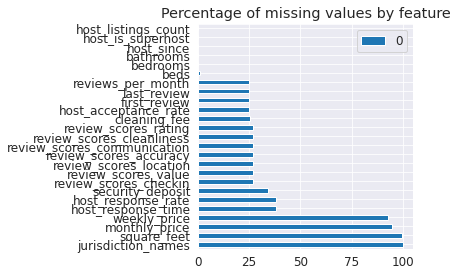

In [162]:
#plotting top 25 columns having largest number of missing values
pd.DataFrame(listings.isnull().sum()/len(listings)*100).nlargest(25,columns=0).plot(kind="barh") 
plt.title("Percentage of missing values by feature")
plt.tight_layout()

###### square_feet, weekly_price, monthly_price, jurisdiction_names and extra_people

Even though the column square_feet seems important, it can be dropped as there are so many missing values and invalid values such as 1, 2, 3 etc. 

Apart from the missing values, columns such as weekly_price, monthly_price do not have much relevance as mostly hosts put up prices for days and the goal of the project is to predict nightly price which should not depend on weekly price or monthly price. 

jurisdiction_names can also be dropped as it does not have any values at all. 

extra_people can also be dropped as it won't be fair to predict nightly price of people allowed based on the price of extra_people. 

In [0]:
#dropping columns
columns_to_drop = ['square_feet', 'weekly_price','monthly_price','jurisdiction_names', 'extra_people']
listings.drop(columns_to_drop, axis=1, inplace=True)

###### experiences_offered

In [164]:
#grouping the values of 'experience_offered'
listings['experiences_offered'].value_counts()

none        84792
business      535
family        448
social        386
romantic      195
Name: experiences_offered, dtype: int64

As most of the values are none, this column can be dropped. 

In [0]:
#dropping experiences_offered based on count
listings.drop('experiences_offered', axis=1, inplace=True)

###### bed_type

In [166]:
#grouping the values of 'bed_type' based on count
listings['bed_type'].value_counts()

Real Bed         85753
Pull-out Sofa      348
Futon              152
Couch               60
Airbed              40
Name: bed_type, dtype: int64

Most listings have the bed_type Real Bed, so that do not contribute anything to the price prediction and this column can be dropped. 

In [0]:
#dropping bed_type
listings.drop('bed_type', axis=1, inplace=True)

###### host related columns

Superhosts are experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests.

In [168]:
#checking value counts
listings['host_is_superhost'].value_counts()

f    73434
t    12912
Name: host_is_superhost, dtype: int64

Drop rows having missing values. 

In [0]:
#dropping rows with missing values
listings.dropna(axis=0, inplace=True, subset=['host_is_superhost'])

Columns such as host_since, host_response_time, host_response_rate, host_acceptance_rate, host_verifications, host_has_profile_pic and host_identity_verified can also be dropped as all these are related to host performance and credibility and it could be related to host_is_superhost.  

In [0]:
#dropping columns
columns_to_drop=['host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_verifications', 
                 'host_has_profile_pic', 'host_identity_verified']
listings.drop(columns_to_drop, axis=1, inplace=True)

host_listings_count,  host_total_listings_count and calculated_host_listings_count seem same and could be highly correlated to each other. 

Check their difference. 

In [171]:
#checking the number of rows where the column values are not same
print(sum((listings.host_listings_count == listings.host_total_listings_count) == False))

0


In [172]:
#checking the number of rows where the column values are not same
print(sum((listings.calculated_host_listings_count == (listings.calculated_host_listings_count_entire_homes+listings.calculated_host_listings_count_private_rooms+listings.calculated_host_listings_count_shared_rooms)) == False))

2211


Drop host_listings_count, host_total_listings_count and retain calculated_host_listings_count as it could be more accurate for the listings of a host. 
calculated_host_listings_count is the sum of the columns calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms and calculated_host_listings_count_shared_rooms.
Drop these columns as it could be highly correlated to calculated_host_listings_count. 

In [0]:
#dropping columns
columns_to_drop = ['host_listings_count','host_total_listings_count', 'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']
listings.drop(columns_to_drop, axis=1, inplace=True)

###### minimum_nights and maximum_nights

It is not allowed to stay more than 90 days in AIRBNBs of Londnon. So check the number of listings having minmum_nights and maximum_nights more than 90 days. 

In [174]:
#checking the count of rows where minimum_nights>90
listings[listings.minimum_nights>90].minimum_nights.count()

259

In [175]:
#checking the count of rows where maximum_nights>90
listings[listings.maximum_nights>90].maximum_nights.count()

58098

Drop the rows where minimum_nights is greater than 90 as the number rows are very less compared to the entire dataset. It won't be fair to drop the rows with maximum_nights greater than 90. So, let's drop this column and columns related to it. 

In [0]:
#removing rows where minimum_nights>90
listings = listings[listings['minimum_nights'] <=90]

It can be seen that there are multiple columns for minimum and maximum night stays. 
Check minimum_nights and minimum_minimum_nights. 

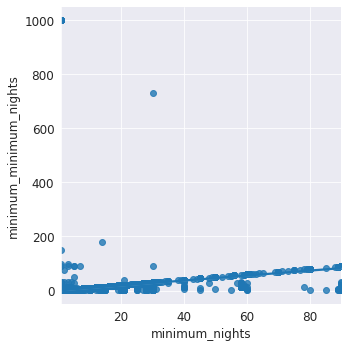

In [177]:
#scatterplot of minimum_nights vs minimum_minimum_nights to understand their relation. 
sns.lmplot(x="minimum_nights",y="minimum_minimum_nights",data=listings)

As the relationship looks linear without considering the outliers, these columns are basically the same and do not bring any value in predicting the price. 
Remove these columns. 

In [0]:
#dropping columns
columns_to_drop = ['maximum_nights','minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
                   'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']
listings.drop(columns_to_drop, axis=1, inplace=True)

###### availability columns and is_business_travel_ready

Columns such as has_availability and is_business_travel_ready have only a single value. Thus, it is not useful in price prediction.  
Drop these columns.

In [179]:
#value count of has_availability
listings['has_availability'].value_counts()

t    86087
Name: has_availability, dtype: int64

In [180]:
#value count of is_business_travel_ready
listings['is_business_travel_ready'].value_counts()

f    86087
Name: is_business_travel_ready, dtype: int64

There are many features for availability, which could be highly correlated with each other. 

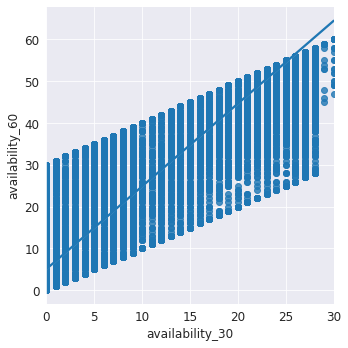

In [181]:
#checking linear relation
sns.lmplot(x="availability_30",y="availability_60",data=listings)

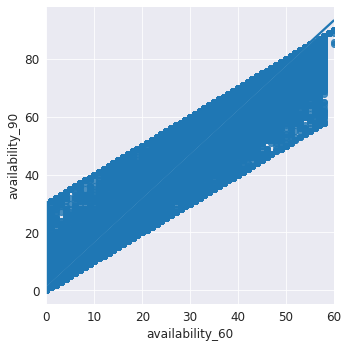

In [182]:
#checking linear relation
sns.lmplot(x="availability_60",y="availability_90",data=listings)

Retain availability_90 as it is illegal to have short-term guests paying to stay in a property for more than 90 days each calendar year. Drop the columns has_availability, is_business_travel_ready, 'availability_30', 'availability_60' and 'availability_365'

In [0]:
#dropping columns
columns_to_drop = ['has_availability', 'is_business_travel_ready', 'availability_30', 'availability_60', 'availability_365']
listings.drop(columns_to_drop, axis=1, inplace=True)

###### price, security_deposit and cleaning_fee

Columns of amount such as price, security_deposit and cleaning_fee are in string format becuase of the currency sign. Convert it into integer. 
security_deposit and cleaning_fee has few NaN values which functionally mean that security_deposit and cleaning_fee has the value zero. Fill these columns. 

In [0]:
#cleaning amount related columns
amount_columns=['price','security_deposit','cleaning_fee']
#create a function to clean price related columns
def clean_amount(column):
    listings[column] = listings[column].str[1:-3]#remove $ sign
    listings[column] = listings[column].str.replace(",", "")#remove commas
    listings[column].fillna(0, inplace=True)#fill nan with 0
    listings[column] = listings[column].astype('int64')#change the datatype
#clean all amount related columns   
for i in amount_columns:
    clean_amount(i)

Check different values for price. 

In [185]:
#checking unique values for price
print(sorted(listings['price'].unique()))

[0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 2

It is quite unrealistic in London to get an accommodation less than or equal to 10 pounds per night. 
Check the count and drop these rows. 

Drop the listings having price greater than 1000 also as most of the listings have nightly price much less than 1000 and the number of rows are quite less. 

In [186]:
#listings where price is less than or equal to 10
listings[listings['price']<=10]

host_is_superhost           neighbourhood  latitude  longitude  \
5207                  f           Tower Hamlets  51.51239   -0.06705   
5342                  f              Wandsworth  51.44825   -0.18442   
5731                  f               Southwark  51.49973   -0.10539   
6488                  f             Westminster  51.51571   -0.16207   
10117                 f                  Newham  51.53869    0.01152   
11016                 f                   Brent  51.54981   -0.21585   
13421                 f                  Newham  51.55222    0.02337   
13958                 f                 Bromley  51.41455   -0.06964   
14692                 f                  Newham  51.53888    0.02723   
14779                 f             Westminster  51.52078   -0.15873   
14780                 f                  Newham  51.53824    0.02895   
14786                 f                  Newham  51.53754    0.02678   
14807                 f                  Newham  51.53928    0.02740   
15754                 f                Lewisham  51.46350   -0.02892   
19203                 f  Hammersmith and Fulham  51.51306   -0.23612   
19204                 f  Hammersmith and Fulham  51.51382   -0.23634   
19853                 f                 Hackney  51.53964   -0.05461   
20501                 f          Waltham Forest  51.58183   -0.03620   
21034                 f               Islington  51.56375   -0.10412   
23486                 f                 Hackney  51.56413   -0.09568   
26901                 t          Waltham Forest  51.57500   -0.03317   
27289                 f                  Barnet  51.65742   -0.16482   
27295                 f                  Camden  51.54414   -0.16598   
28971                 f                 Hackney  51.56574   -0.08985   
29401                 f           Tower Hamlets  51.53171   -0.05539   
30486                 f               Greenwich  51.48374    0.10431   
30797                 f                 Bromley  51.34194    0.03007   
31230                 f               Southwark  51.49055   -0.08157   
31429                 f              Wandsworth  51.45720   -0.19958   
31439                 f                  Camden  51.51735   -0.13277   
31956                 f               Greenwich  51.46154    0.04912   
32036                 f           Tower Hamlets  51.50700   -0.06438   
32134                 f           Tower Hamlets  51.51743   -0.06528   
32210                 f                 Lambeth  51.49156   -0.10838   
33204                 f               Southwark  51.47847   -0.08453   
33422                 f                  Newham  51.52064    0.04885   
33499                 f           Tower Hamlets  51.51532   -0.06158   
33654                 f                  Camden  51.52540   -0.12302   
33773                 f                  Newham  51.51945    0.05004   
33837                 f  Hammersmith and Fulham  51.48897   -0.21802   
33918                 f          Waltham Forest  51.56492   -0.00344   
34359                 f           Tower Hamlets  51.50776   -0.02094   
35935                 t           Tower Hamlets  51.51763   -0.07079   
38404                 t                Lewisham  51.42511   -0.04525   
38893                 f                 Lambeth  51.49306   -0.11240   
38956                 f                 Croydon  51.35508   -0.06734   
39174                 t           Tower Hamlets  51.52227   -0.07518   
40540                 t                 Hackney  51.54574   -0.07968   
40952                 f               Islington  51.53973   -0.11597   
41149                 f                  Newham  51.51654    0.05211   
41904                 f                  Harrow  51.59659   -0.28671   
42086                 f                  Merton  51.41748   -0.15873   
42726                 f                 Lambeth  51.43869   -0.10130   
43244                 f               Islington  51.53749   -0.11826   
43550                 f               Southwar

In [0]:
#removing rows where price<10
listings = listings[listings['price']>10]
#removing rows where price>1000
listings = listings[listings['price']<=1000]

Let's see unique values for cleaning fee. 

In [188]:
#unique values for cleaning fee
print(sorted(listings['cleaning_fee'].unique()))

[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 137, 138, 139, 140, 141, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 169, 170, 171, 173, 174, 175, 176, 179, 180, 185, 186, 187, 188, 189, 190, 191, 195, 196, 198, 199, 200, 205, 206, 210, 211, 212, 215, 217, 219, 220, 225, 228, 230, 232, 235, 238, 240, 243, 245, 247, 248, 250, 255, 259, 261, 268, 270, 273, 274, 275, 280, 282, 283, 287, 288, 290, 292, 297, 298, 299, 300, 306

Cleaning fee greater than 600 happens very rarely. So, drop the outliers. 

In [0]:
#remove listings where cleaning fee is greater than 600
listings = listings[listings['cleaning_fee']<600]

###### bedrooms, bathrooms and beds

Columns such as bedrooms, bathrooms and beds are very important in predicting price. 
First drop the rows that have unrealistic value such as 0 for these columns and impute missing values for these columns using the median. 

In [0]:
#remove the rows having value 0 for these bedrooms, beds and bathrooms
listings = listings[listings['bedrooms']!=0]
listings = listings[listings['bathrooms']!=0]
listings = listings[listings['beds']!=0]

In [0]:
#fill missing values with median
for column in ['bathrooms', 'bedrooms', 'beds']:
    listings[column].fillna(listings[column].median(), inplace=True)

Listings with more than 10 bedrooms, 20 beds and 10 bathrooms are very rare. So, lets drop rows with those rare values. 

In [0]:
#remove rows where the number of bedrooms>10
listings = listings[listings['bedrooms']<=10]
#remove rows where the number of bathrooms>10
listings = listings[listings['bathrooms']<=10]
#remove rows where the number of beds>20
listings = listings[listings['beds']<=20]

###### accomodates and guests_included

Listings which allow people more than 10 and guests more than 20 are very less. So, let's remove those outliers for a better prediction. 

In [0]:
#remove rows where accommodates>10
listings = listings[listings['accommodates']<=10]
#remove rows where the number of guests included>20
listings = listings[listings['guests_included']<=20]

###### review related columns

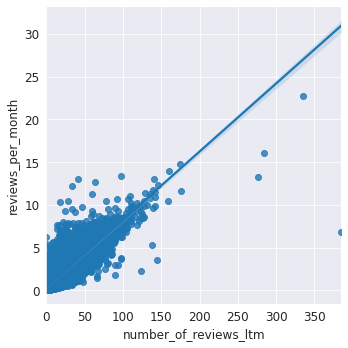

In [194]:
#checking the linear relationship between these 2 columns
sns.lmplot(x="number_of_reviews_ltm",y="reviews_per_month",data=listings)

Columns such as first_review, last_review can be dropped as these columns show the experience of the host and could be related to host_is_superhost.
Retain number_of_reviews_ltm column and drop the columns number_of_reviews and reviews_per_month as it is almost linearly proportional except the outliers. 

In [0]:
#dropping columns
columns_to_drop=['number_of_reviews', 'first_review', 'last_review', 'reviews_per_month']
listings.drop(columns_to_drop, axis=1, inplace=True)

Let's remove outliers in the column number_of_reviews_ltm. 

In [0]:
#removing rows where the number_of_reviews_ltm is greater than 250
listings = listings[listings['number_of_reviews_ltm']<=250]

Create a function that takes a column, bin cut points and labels, replaces the original column with a binned version, and replaces nulls with 'Unknown' if not specified.
It won't be fair to drop those rows as there are too many and it means no one has reviewed it yet. 

In [0]:
#bin numerical values into categorical variables
def bin_column(column, bins, labels, na_label='Unknown'):
    listings[column] = pd.cut(listings[column], bins=bins, labels=labels, include_lowest=True)#bin the columns
    listings[column] = listings[column].astype('str')#changing datatype to string
    listings[column].replace('nan', na_label, inplace=True)#remove nan values with the na_label given

review_scores_rating is out of 100 and all other review related columns such as review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location and review_scores_value are out of 10.
Check the distribution of all these columns by plotting and binning it. 

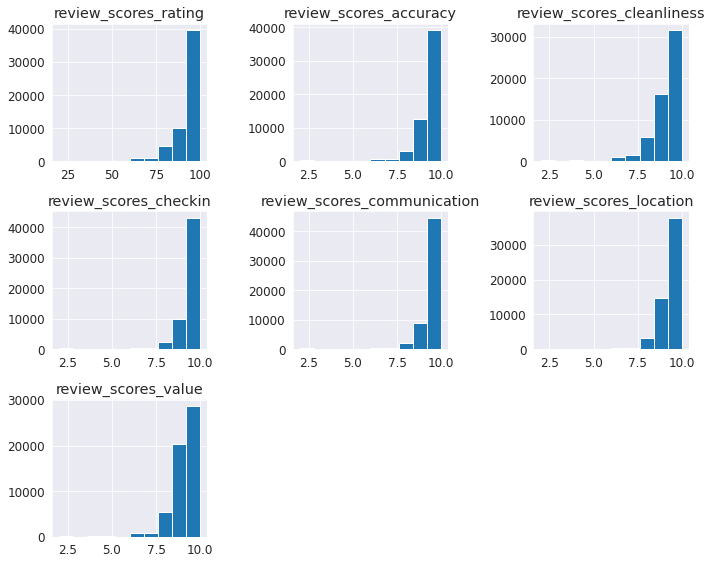

In [198]:
#checking the distribution of all review realted columns
columns_to_plot = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                   'review_scores_communication', 'review_scores_location', 'review_scores_value']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    listings[column].hist(bins=10,ax=ax)#hist plot of the column
    ax.set_title(column)
fig.tight_layout()
plt.show()

It is evident that majority of the ratings are 10 and 9 as that is the rating people usually give. Rest all, keep as separate and will be considered as low rating. 
Change the column to categorical variable for all review related columns. 

In [0]:
#bin review_scores_rating
bin_column('review_scores_rating', bins=[0, 80, 95, 100], labels=['0-79/100', '80-94/100', '95-100/100'],na_label='no reviews')
#bin all other review column out of 10. 
columns_to_bin = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                  'review_scores_location', 'review_scores_value']
for column in columns_to_bin:
    bin_column(column,bins=[0, 8, 9, 10],labels=['0-8/10', '9/10', '10/10'],na_label='no reviews')

###### property_type

Check the count for different property_type and categorise all properties into House, Apartment and Other. 

In [200]:
#checking the count of unique property types
listings.property_type.nunique()

39

In [201]:
#checking the value counts of property type
listings.property_type.value_counts()

Apartment                        51559
House                            16807
Townhouse                         2649
Condominium                       2011
Serviced apartment                1230
Loft                               607
Bed and breakfast                  512
Boutique hotel                     331
Guest suite                        284
Guesthouse                         265
Hotel                              217
Hostel                             170
Other                              166
Bungalow                           146
Cottage                             87
Boat                                48
Tiny house                          44
Aparthotel                          44
Houseboat                           35
Villa                               32
Cabin                               23
Earth house                         18
Chalet                              11
Hut                                  8
Casa particular (Cuba)               6
Yurt                     

In [0]:
#replace all similar property types as House/Apartment
listings.property_type.replace({'Townhouse': 'House', 'Serviced apartment': 'Apartment', 'Condominium': 'Apartment',
    'Loft': 'Apartment', 'Bungalow': 'House', 'Cottage': 'House', 'Guesthouse': 'House', 'Villa': 'House', 
    'Tiny house': 'House', 'Earth house': 'House', 'Chalet': 'House'}, inplace=True)
#set all other property types as Other
listings.loc[~listings.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

###### cancellation policy

Check the cancellation policy and categorise it into mainly 3 categories by replacing with strict, moderate and flexible. 

In [203]:
#checking value counts for cancellation policy
listings.cancellation_policy.value_counts()

strict_14_with_grace_period    32644
flexible                       25506
moderate                       18656
super_strict_30                  291
super_strict_60                  233
luxury_moderate                    8
strict                             2
luxury_super_strict_95             2
Name: cancellation_policy, dtype: int64

In [0]:
#replace all cancellation policies with strict/moderate/flexible based on similarity
listings.cancellation_policy.replace({'strict_14_with_grace_period': 'strict', 'super_strict_30': 'strict', 
                                      'super_strict_60': 'strict', 'luxury_moderate': 'moderate',
                                      'luxury_super_strict_95':'strict'}, inplace=True)

###### amenities

amenities are very important for a guest while booking an AirBNB. 

In [205]:
# Creating a set of all possible amenities
amenities_list = list(listings.amenities)#change to list
amenities_list_string = " ".join(amenities_list)
#remove all extra characters
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
#split different amenities
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
#covert it into a set to have unique values
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'Alfresco bathtub',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Balcony',
 'Barbecue utensils',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Body soap',
 'Bose sound system',
 'Bread maker',
 'Breakfast',
 'Breakfast bar',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Central air conditioning',
 'Changing table',
 "Chef's kitchen",
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Desk',
 'Dining area',
 'Dining table',
 'Disabled parking spot',
 'Dishes

In [0]:
#number of columns of the dataset
le = listings.shape[1]

There are so many amenities. Some could be important than others. I have chosen few amenities which I felt is important

In [207]:
#creating columns for different important amenities and set as 1 if it is present
listings.loc[listings['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
listings.loc[listings['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV|TV|Video Games|Satellite TV|Sound system|Media room'), 'electronics and entertainment'] = 1
listings.loc[listings['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque|Natural gas barbeque|Barbecue utensils'), 'bbq'] = 1
listings.loc[listings['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
listings.loc[listings['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
listings.loc[listings['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
listings.loc[listings['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
listings.loc[listings['amenities'].str.contains('Cooking basics|Coffee maker|Espresso machine|Nespresso machine|Oven|Dishwasher|Dryer|Washer|Stove|Convection oven|Microwave|Mini fridge'), 'kitchen_stuff'] = 1
listings.loc[listings['amenities'].str.contains('Elevator'), 'elevator'] = 1
listings.loc[listings['amenities'].str.contains('Exercise equipment|Gym|gym|Yoga studio|Shared gym'), 'gym'] = 1
listings.loc[listings['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
listings.loc[listings['amenities'].str.contains('parking'), 'parking'] = 1
listings.loc[listings['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
listings.loc[listings['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool|Private hot tub|Alfresco bathtub'), 'hot_tub_sauna_or_pool'] = 1
listings.loc[listings['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
listings.loc[listings['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)|Pets live on this property'), 'pets_allowed'] = 1
listings.loc[listings['amenities'].str.contains('Safe|Security system|Safe|Safety card|Security cameras|Smart lock'), 'secure'] = 1
listings.loc[listings['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
listings.loc[listings['amenities'].str.contains('Step-free access|Wheelchair|Accessible|Accessible-height bed|Accessible-height toilet|Wheelchair accessible'), 'accessible'] = 1
listings.loc[listings['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1
listings.loc[listings['amenities'].str.contains('Internet|Pocket wifi|Wifi|Wireless Internet'), 'internet'] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Replace null values with zeros. 
Create lists of frequent and infrequent amenities. 

In [208]:
# Replace nulls with zeros for new columns
columns_to_replace_nulls = listings.iloc[:,le:].columns
listings[columns_to_replace_nulls] = listings[columns_to_replace_nulls].fillna(0)

# Create a list of amenities where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in listings.iloc[:,le:].columns:
    if listings[col].sum() < len(listings)*0.1:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Create a list of amenities where one category (true or false) contains more than 90% of listings
frequent_amenities = []
for col in listings.iloc[:,le:].columns:
    if listings[col].sum() > len(listings)*0.9:
        frequent_amenities.append(col)
print(frequent_amenities)

['check_in_24h', 'bbq', 'nature_and_views', 'air_conditioning', 'gym', 'hot_tub_sauna_or_pool', 'secure', 'accessible', 'event_suitable']
['kitchen_stuff', 'internet']


Drop frequent and infrequent amenities. 

In [0]:
# Drop infrequent amenities
listings.drop(infrequent_amenities, axis=1, inplace=True)
# Drop frequent amenities              
listings.drop(frequent_amenities, axis=1, inplace=True)

Change the datatype of these amenities columns to int. 

In [0]:
#changing datatypes of amenities columns into int
listings[listings.iloc[:,le:].columns] = listings[listings.iloc[:,le:].columns].astype(int)

In [0]:
# Drop the original amenity feature
listings.drop('amenities', axis=1, inplace=True)

###### Replace columns having values f/t with 0/1

In [0]:
#replacing f and t with 0 and 1
listings.replace({'f': 0, 't': 1}, inplace=True)

## Exploratory Data Analysis

Create a function to plot category count and median price of binary variables.

In [0]:
#fn to plot count and median price
def binary_count_medianprice_plot(column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
    fig.suptitle(column, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the subtitle does not overlap with the ax plot titles
    #plot count of the column values
    listings.groupby(column).size().plot(kind='bar', ax=ax1, color=['crimson', 'darkslategray'])
    ax1.set_xticklabels(labels=['0', '1'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    #plot median price for the column values
    listings.groupby(column).price.median().plot(kind='bar', ax=ax2, color=['crimson', 'darkslategray'])
    ax2.set_xticklabels(labels=['0', '1'], rotation=0)
    ax2.set_title('Median price (£)')
    ax2.set_xlabel('')
    
    plt.show()

###### host_is_superhost
Check the count and median price for both the values. 

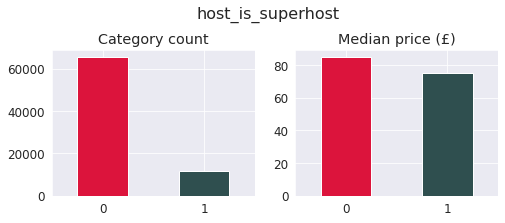

0    0.848569
1    0.151431
Name: host_is_superhost, dtype: float64


In [214]:
#plotting count and median price for host_is_superhost
binary_count_medianprice_plot('host_is_superhost')
print(listings.host_is_superhost.value_counts(normalize=True))

From the plot above, it can be concluded that being a superhost do not increase the median price. 
It can be assumed that as superhosts are experienced, they attract and retain guests by offering low prices. 

###### neighbourhood

Explore the neighbourhoods in London. 

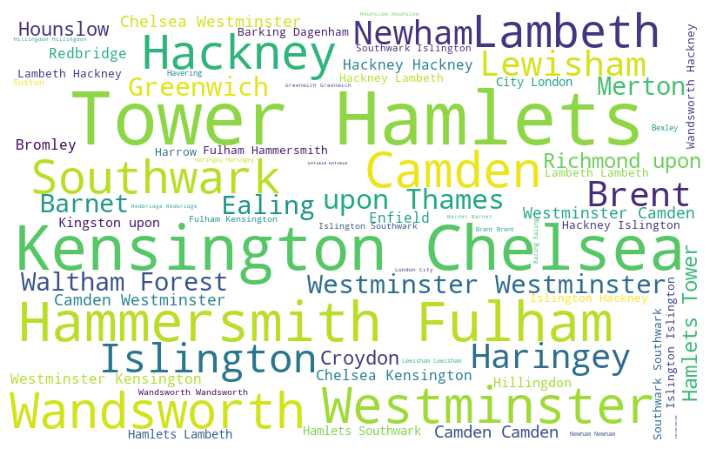

In [215]:
#plot a word cloud for all the neighbourhoods
from wordcloud import WordCloud
plt.subplots(figsize=(16,8))
wordcloud = WordCloud(background_color='white',width=800,height=500).generate(" ".join(listings.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Neighbourhood popularity

Show the number of listings per neighbourhood. 

Text(0.5, 1.0, 'Number of listings by neighbourhood')

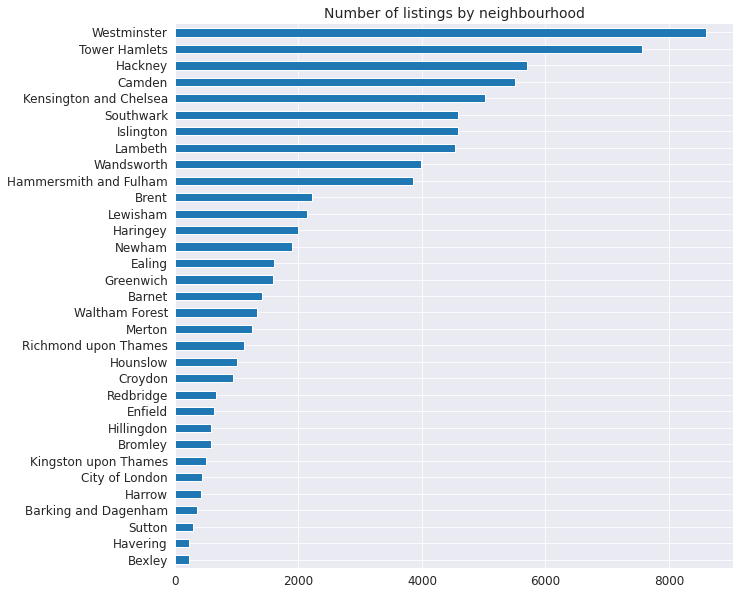

In [216]:
#plot a barchart for the number of listings in each neighbourhood
listings['neighbourhood'].value_counts().sort_values().plot.barh(figsize=(10, 10));
sns.despine()
plt.title('Number of listings by neighbourhood', fontsize=14)

Westminister has most number of listings and are quite popular for AirBNB. Bexley has least number of listings

Map of neighbourhood

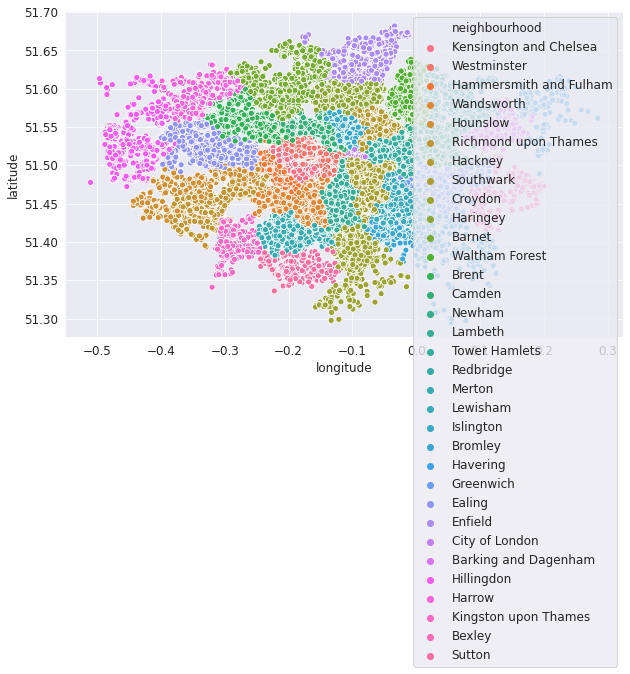

In [217]:
#scatter plot of different neighbourhoods using latitude and longitude
plt.figure(figsize=(10,6))
sns.scatterplot(listings.longitude,listings.latitude,hue=listings.neighbourhood)
plt.ioff()

Relation between neighbourhood and Availability of Room

Text(0.5, 1.0, 'Relation between neighbourhood and Availability of Room')

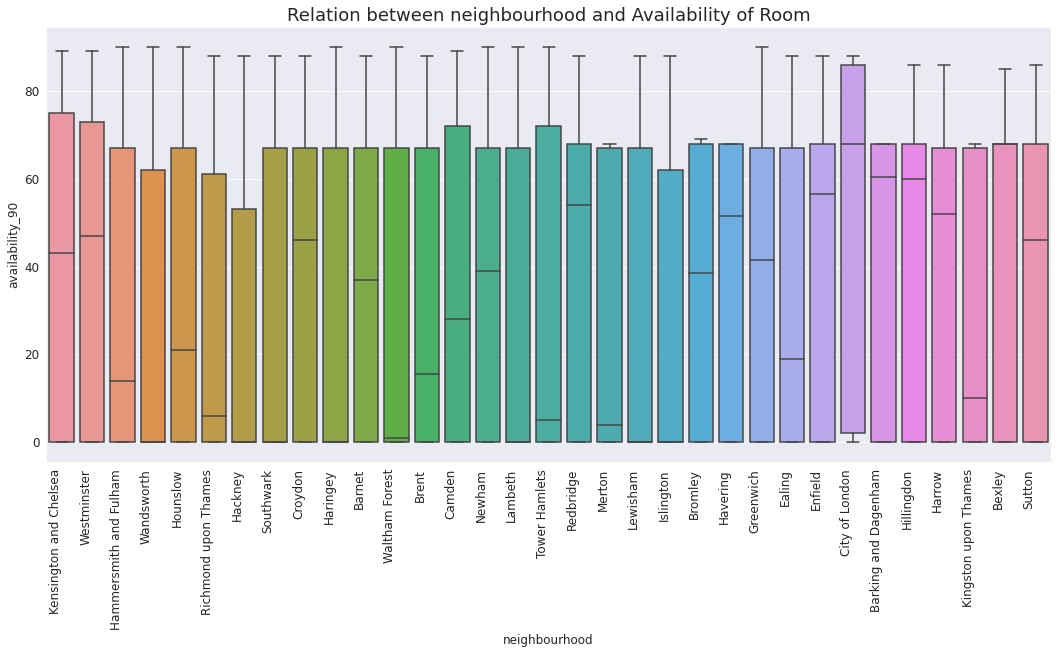

In [218]:
#plotting the availability of each neighbourhood
plt.figure(figsize=(18,8))
ax = sns.boxplot(data=listings, x='neighbourhood',y='availability_90')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=12)
plt.title('Relation between neighbourhood and Availability of Room', size=18)

City of London has the highest number of days available in 90 days

Number of superhost listings by neighbourhood

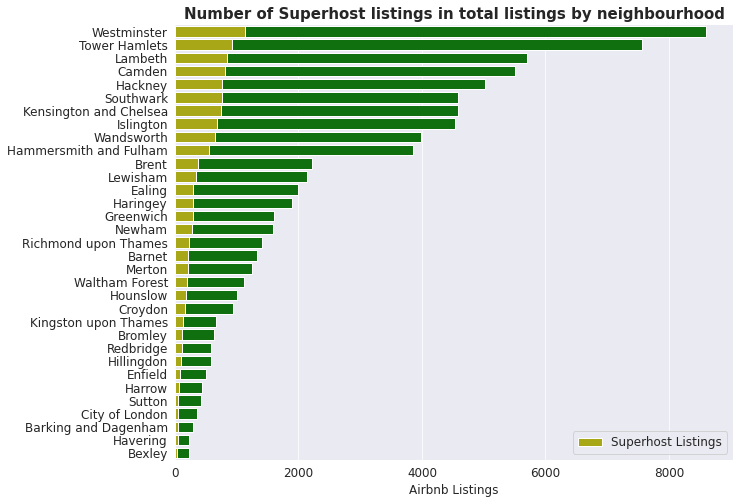

In [219]:
# Figure : Number of Super Host Listings
f, ax = plt.subplots(figsize=(10, 8))
#plot the neighbourhood count
neighbourhood_group_count = listings['neighbourhood'].value_counts().reset_index()
sns.barplot(x='neighbourhood', y='index', data=neighbourhood_group_count, color="g")
#plot the superhost count
neighbourhood_superhost_count = listings['neighbourhood'][listings['host_is_superhost'] == 1].value_counts().reset_index()
sns.barplot(x="neighbourhood", y="index", data=neighbourhood_superhost_count,label="Superhost Listings", color="y")

ax.legend(ncol=2, loc="best", frameon=True)
ax.set(ylabel="", xlabel="Airbnb Listings")
sns.despine(left=True, bottom=True)
ax.set_title("Number of Superhost listings in total listings by neighbourhood", fontsize=15, weight='bold')
plt.show()
plt.close()

Number of superhosts are linearly proportional to number of listings per neighbourhood. 

Mean price of Airbnbs based on neighbourhood

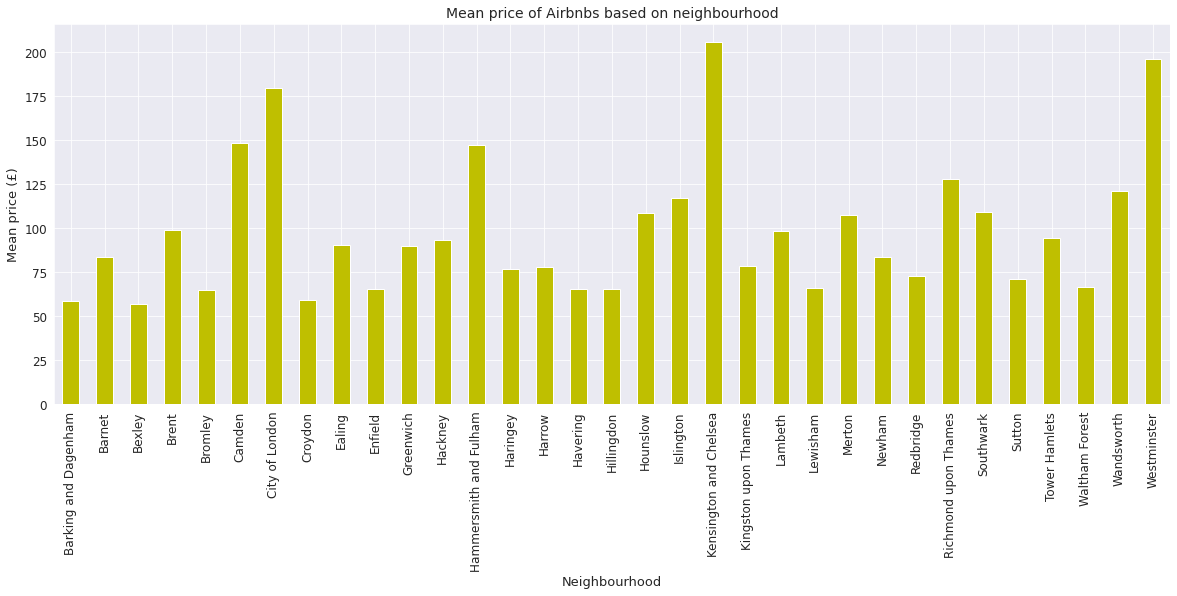

In [220]:
#plotting mean price airbnb listings for each neighbourood
plt.figure(figsize=(20,7))
listings.groupby('neighbourhood').price.mean().plot(kind='bar', color="y")
plt.title('Mean price of Airbnbs based on neighbourhood', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=13)
plt.ylabel('Mean price (£)', fontsize=13)
plt.xticks(rotation=90)
plt.show()

Check the median price. 

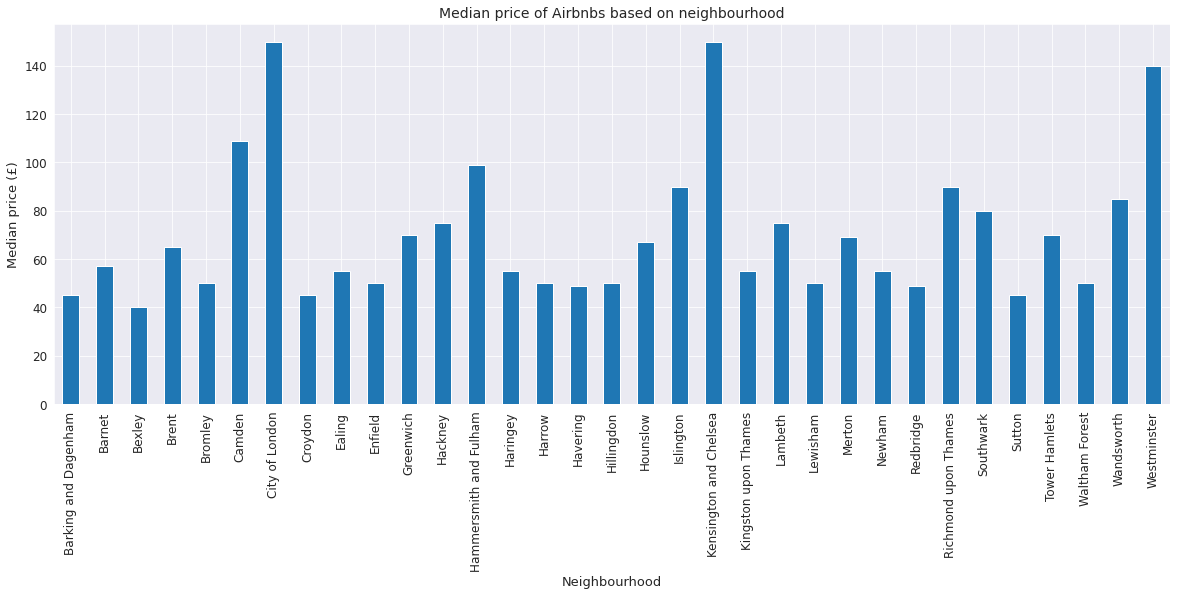

In [221]:
#plotting median price airbnb listings for each neighbourood
plt.figure(figsize=(20,7))
listings.groupby('neighbourhood').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs based on neighbourhood', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=13)
plt.ylabel('Median price (£)', fontsize=13)
plt.xticks(rotation=90)
plt.show()

Kensingston and Chelsea has the highest mean price. Westminister has 2nd highest mean price more than City of London.

City of London and Kensingston and Chelsea have the highest Median Price, whereas Bexley has the least median price. 

It can be concluded that Kensingston and Chelsea, Westminister and City of London usually have expensive listings. It could be because of the popularity of the neighbourhood. 

###### Property Type

Map of property_type

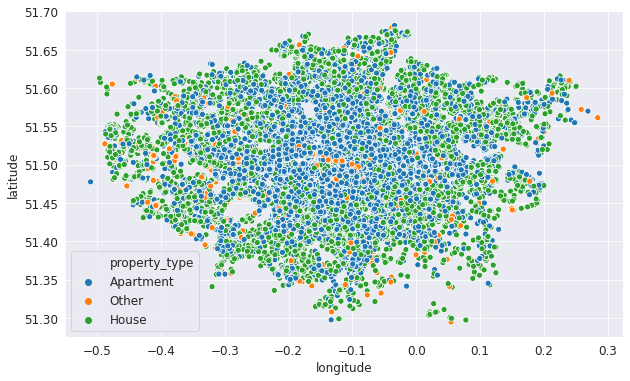

In [222]:
#plotting the spread of different property types across London
plt.figure(figsize=(10,6))
sns.scatterplot(listings.longitude,listings.latitude,hue=listings.property_type)
plt.ioff()

Count of different property type in London

Text(0.5, 1.0, 'Property Type')

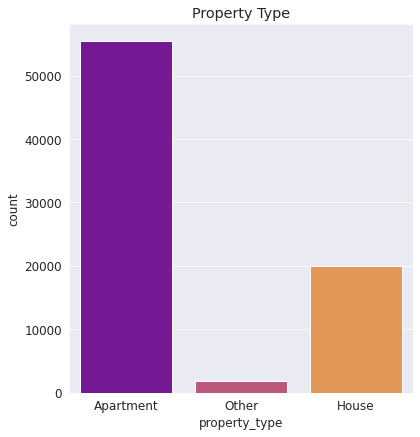

In [223]:
#plotting the count of different property types in London
sns.countplot(listings['property_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.tight_layout()
plt.title('Property Type')

As seen in the map and the count plot of property type, most of the peoperties are apartments, then comes the house.

Let's see it's relation with price. 

               price
property_type       
House             55
Other             85
Apartment         90


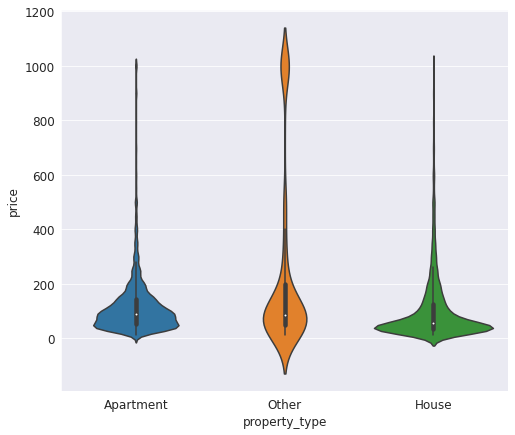

In [224]:
#plotting the median price of different property types
f, ax = plt.subplots(figsize=(8, 7))
sns.violinplot(x="property_type", y="price", data=listings)

print(listings.groupby(["property_type"]).agg({"price":"median"}).sort_values("price", ascending=True))

Based on the violin plots, the distributions are non-normal, with very long tails towards higher prices. The width of the violin plot is the mode. The median was chosen as the metric as it is least likely to be affected by outliers than the average. Highest median price is for apartment and there are so many apartments in London also. Second highest is House as Other can be anything. Other includes many properties with high price and few with low price. For example, it can be either a castle or a tent. 

###### Room Type

Number of listings by room type. 

Text(0.5, 1.0, 'Room Type')

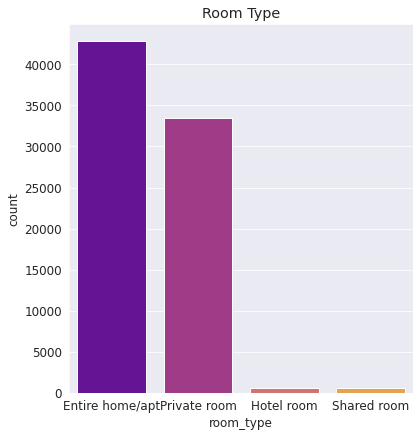

In [225]:
#plotting the count of different room types
sns.countplot(listings['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.tight_layout()
plt.title('Room Type')

Highest number of listings are Entire home/apartment and second highest is Private room. Very few listings are Hotel room and Shared room. 

Map of Room Type

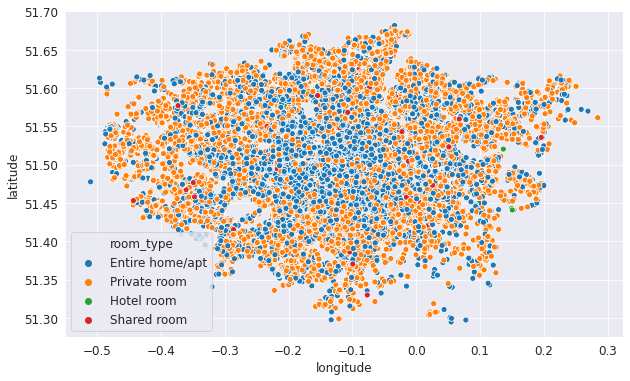

In [226]:
#scatter plot of different roomtypes to check the spread across London
plt.figure(figsize=(10,6))
sns.scatterplot(listings.longitude,listings.latitude,hue=listings.room_type)
plt.ioff()

Median price by room type

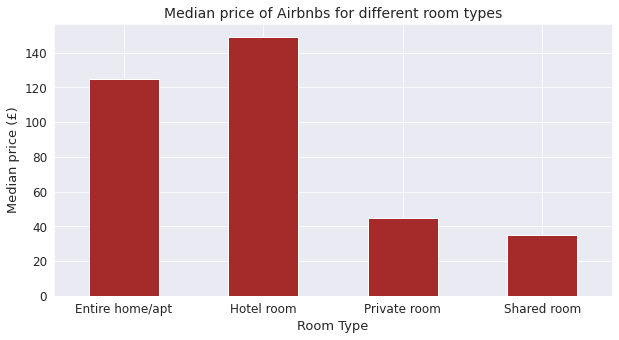

In [227]:
#plotting median price of different room types
plt.figure(figsize=(10,5))
listings.groupby('room_type').price.median().plot(kind='bar', color='brown')
plt.title('Median price of Airbnbs for different room types', fontsize=14)
plt.xlabel('Room Type', fontsize=13)
plt.ylabel('Median price (£)', fontsize=13)
plt.xticks(rotation=0)
plt.show()

Even though hotel rooms are very limited in London, it has highest median price. 

###### accommodates, bathrooms, bedrooms, beds and guests_included

All these features depend on the number of people, so let's visualize these features together. 

In [0]:
#create a function to plot the count of different categorical values in different columns
def count_plot(column):
    plt.figure(figsize=(8,4))
    listings[column].value_counts().plot(kind='bar', color=['crimson', 'darkcyan', 'darkslategray', 'darkorchid', 'dimgrey', 'olivedrab', 'orange', 'red', 'deepskyblue','salmon', 'dodgerblue', 'mediumvioletred'])
    plt.title(column)
    plt.xticks(rotation=0)
    plt.show()

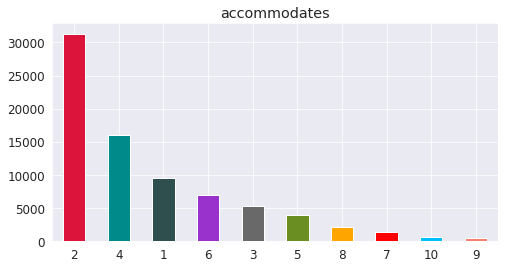

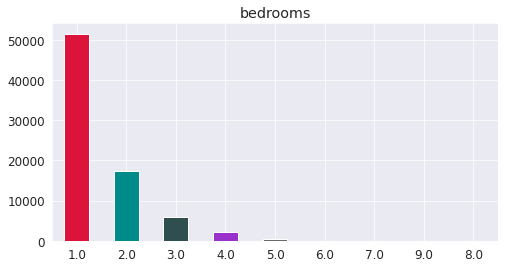

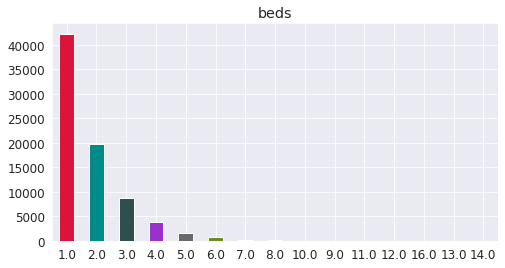

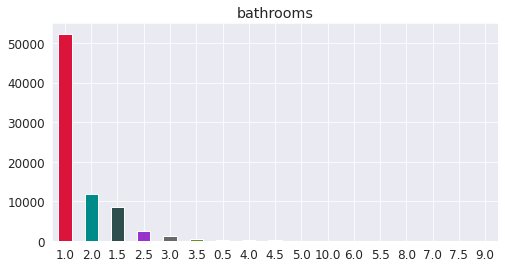

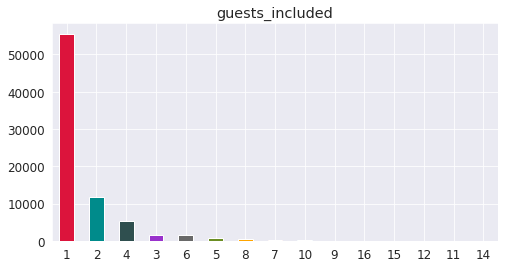

In [229]:
#plot the count of columns 'accommodates', 'bedrooms', 'beds', 'bathrooms' and 'guests_included'
for col in ['accommodates', 'bedrooms', 'beds', 'bathrooms', 'guests_included']:
    count_plot(col)

Most of the listings allow only 1 guest. 
The most common property setup sleeps two people in one bed in one bedroom, with one bathroom.

Relation between property type and number of bedrooms

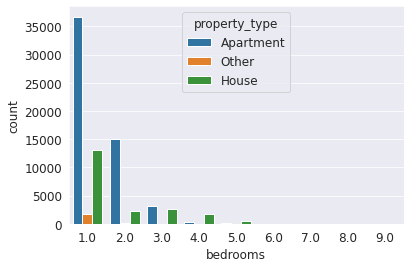

In [230]:
#plotting the count of different bedrooms in different property types
sns.countplot(x='bedrooms',data=listings,hue="property_type")

Most of the properties are 1 bedroom apartments. A good number of 2 bedroom apartments are also available. 

Bedrooms vs Price

Let's plot the distribution of overall price for different number of bedrooms. 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


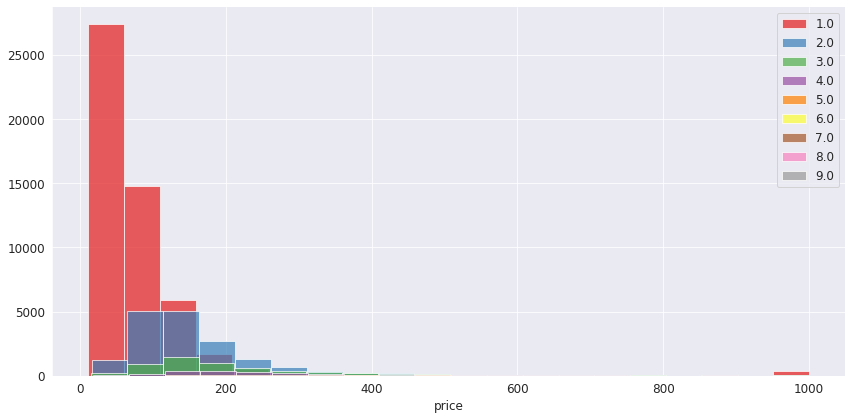

In [231]:
#plotting the distribution of price for different number of bedrooms
sns.set_style('darkgrid')
g = sns.FacetGrid(listings,hue="bedrooms",palette='Set1',size=6,aspect=2)
g = g.map(plt.hist,'price',bins=20,alpha=0.7)
plt.legend()

From the above facet grid, it can be concluded that majority of 1,2 and 3 bedrooms apartments are sold under 150 pounds. 

Median price by accommodates and neighbourhood. 

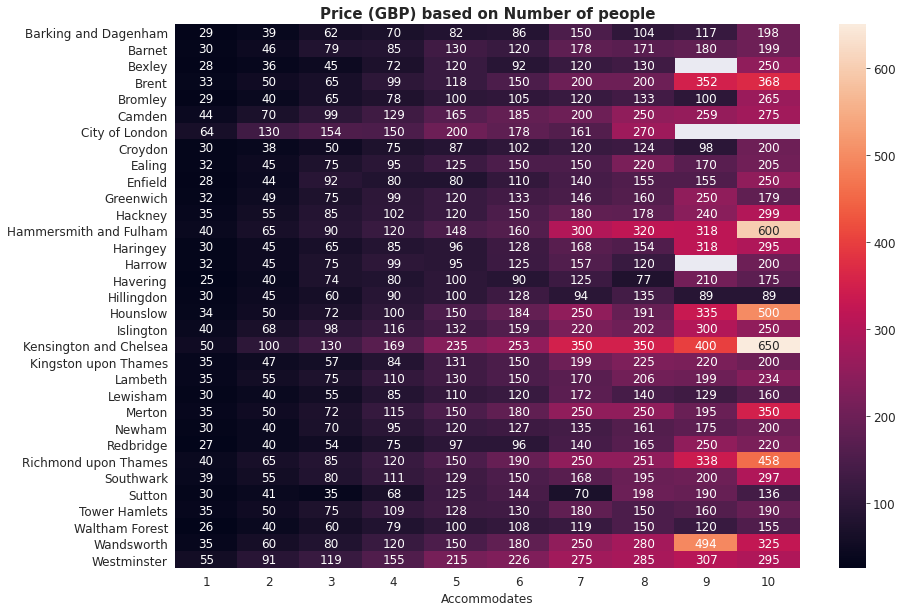

In [232]:
#plotting the median price of different neighbourhoods based on the number of people
# Price per person - median
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(listings.groupby([
        'neighbourhood', 'accommodates']).price.median().unstack(),
            annot=True, 
            fmt=".0f")
ax.set(xlabel="Accommodates",ylabel="")           
ax.set_title('Price (GBP) based on Number of people', fontsize=15, weight='bold')
plt.show()

Listings in Keningston and Chelsea which accomodate 10 people have maximum median price and listings in Havering which accomodate 1 person have minimum median price. 
So price is heavily dependent on accomodates and neighbourhood. 

Median price by property_type and bedrooms

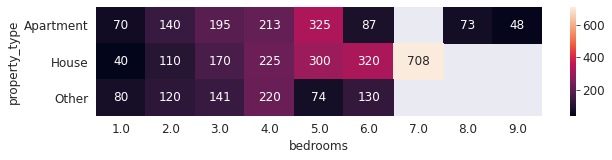

In [233]:
#plotting the median price of different property types based on the number of bedrooms
plt.figure(figsize=(10,2))
sns.heatmap(listings.groupby(['property_type', 'bedrooms']).price.median().unstack(), annot=True, fmt=".0f")

Houses with 7 bedrooms have very high price. As Other can be anything, it is difficult to make assumptions on that.

In [0]:
#creating a funcion to plot median price for different values of a column
def plot_medianprice(column):
    plt.figure(figsize=(10,5))
    listings.groupby(column).price.median().plot(kind='bar', color=['dodgerblue', 'crimson','mediumseagreen','darkgray','aqua','coral','cornflowerblue','darkgoldenrod','blueviolet','brown','burlywood','cadetblue','chartreuse','chocolate','darkgray','darkgreen','darkkhaki','darkmagenta','darkolivegreen'])
    title='Median price of Airbnbs for '+ column
    plt.title(title, fontsize=14)
    plt.xlabel(column, fontsize=13)
    plt.ylabel('Median price (£)', fontsize=13)
    plt.xticks(rotation=0)
    plt.show()

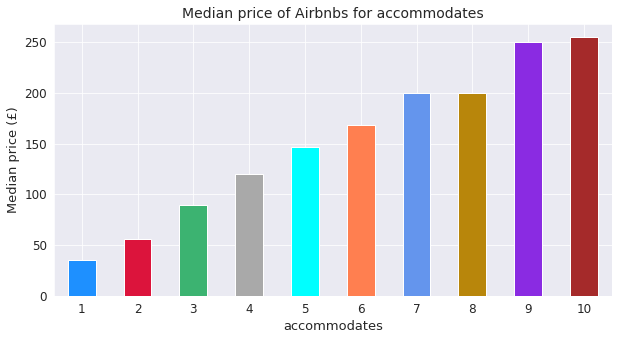

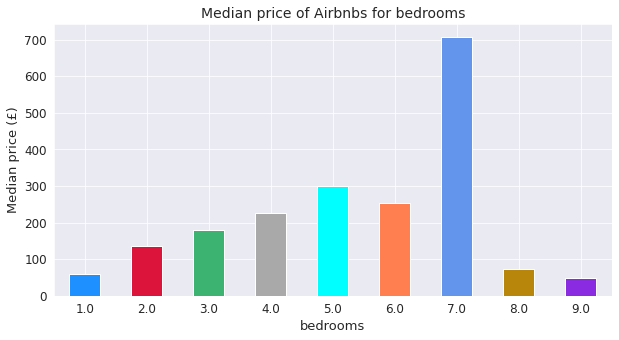

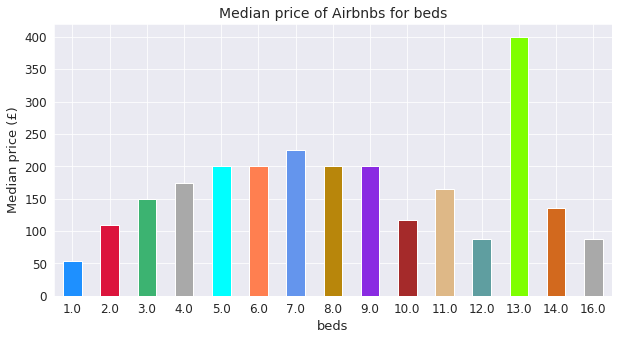

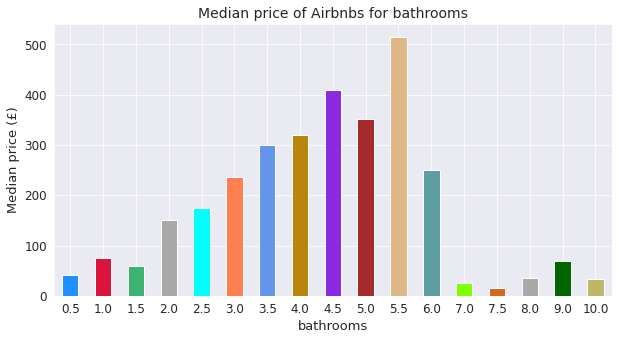

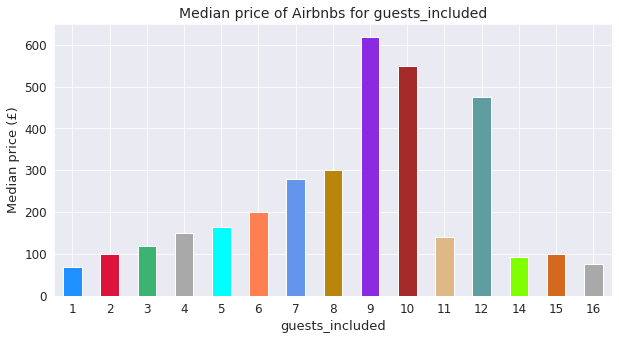

In [235]:
#plotting the median price for columns such as 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'guests_included'
for col in ['accommodates', 'bedrooms', 'beds', 'bathrooms', 'guests_included']:
    plot_medianprice(col)

Unsurprisingly, properties that accommodate more people achieve noticeably higher rates per night.
It can be concluded price increases with the value for features like bedrooms, bathrooms, beds, guests_included till an optimum number. After that behaviour is not dependent on these features. But for the feature accomodates, the price is almost linearly dependent on it.  

###### review related columns

Number of reviews in last 12 months vs Price

Text(0, 0.5, 'Price')

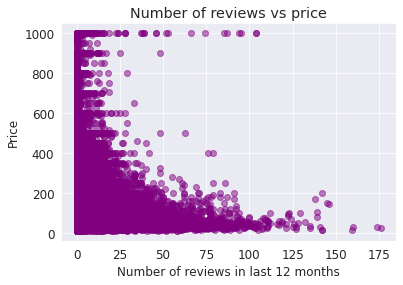

In [236]:
#plotting the scatter plot price against number_of_reviews_ltm
fig, ax = plt.subplots()    
ax.scatter(listings.number_of_reviews_ltm,listings.price,color="purple",alpha=0.5)
ax.set_title('Number of reviews vs price')
ax.set_xlabel('Number of reviews in last 12 months')
ax.set_ylabel('Price')

It can be seen that the price is higher for listings where number of reviews are less. High price can be the reason for the number of reviews being less as those are not getting booked much. There are only very few listings with very high number of reviews. Number of listings with very high price and more number of ratings are also very less. 

Review_scores

As seen earlier, most of the reviews have got 10/10.
Plot the number of listings for each review category

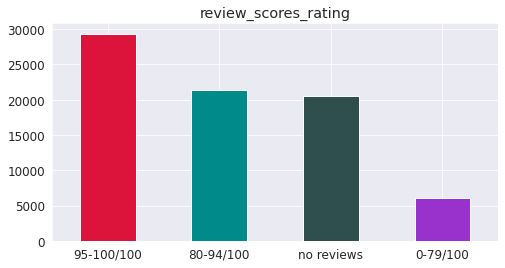

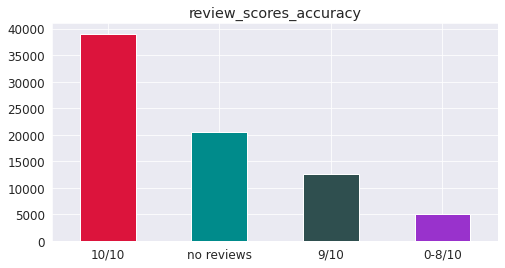

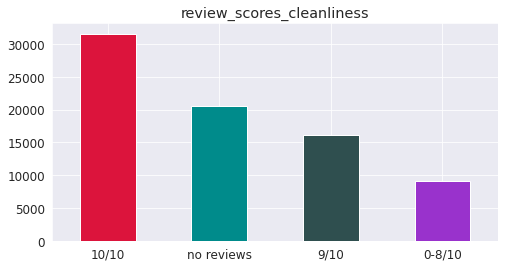

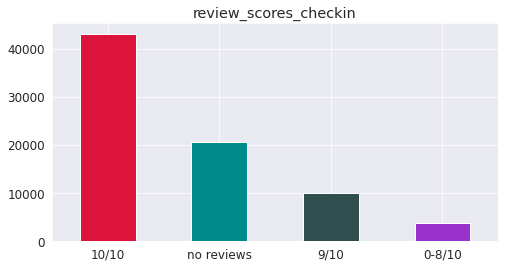

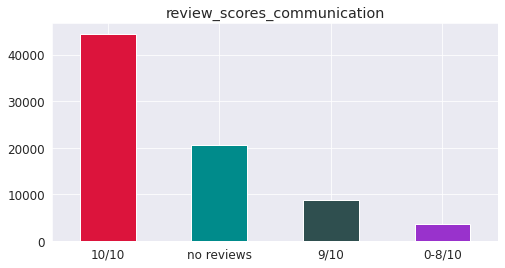

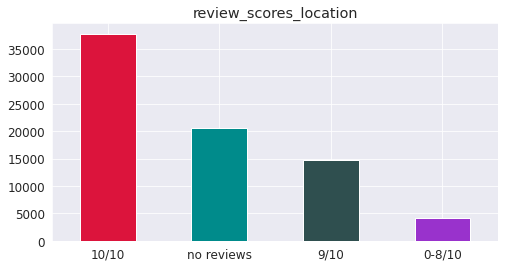

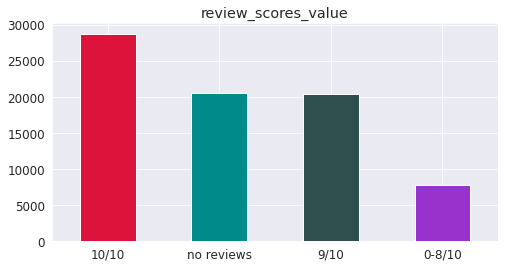

In [237]:
#plotting count of all review score related columns
for column in list(listings.columns[listings.columns.str.startswith("review_scores") == True]):
    count_plot(column)

As seen, these features look highly correlated. There is no point in retaining all of it as the complexity of the model will become high.

According to us, it made sense to retain the column review_scores_rating as that is what customer rated by considering all the factors.

Drop all other review related columns.

In [0]:
#dropping columns
columns_to_drop = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
listings.drop(columns_to_drop, axis=1, inplace=True)

###### instant_bookable

Check the count and median price for this feature. 

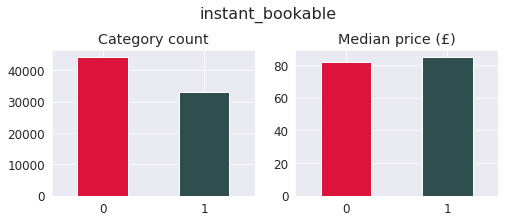

0    0.57313
1    0.42687
Name: instant_bookable, dtype: float64


In [239]:
#plot count and median price for instant_bokkable column
binary_count_medianprice_plot('instant_bookable')
print(listings.instant_bookable.value_counts(normalize=True))

As median price is almost the same for both the category, it can be concluded that price does not have much dependency on this feature. 
So this column can be dropped. 

In [0]:
#dropping instant_bookable
listings.drop('instant_bookable', axis=1, inplace=True)

###### cancellation_policy

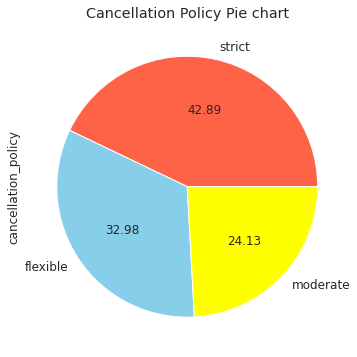

In [241]:
#plotting the value counts for different cancellation policy
listings.cancellation_policy.value_counts(0).plot.pie(colors=["tomato", "skyblue","yellow"],
                   figsize=(6,6), autopct = '%.2f',
                   title = "Cancellation Policy Pie chart")

Majority of the listings have strict cancellation policy. 

Check median price for each category

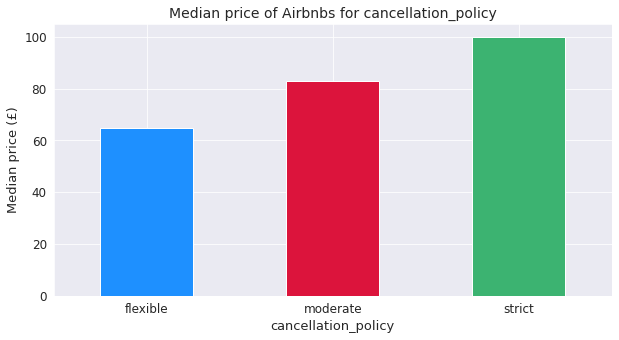

In [242]:
#plotting median price for different cancellation policies
plot_medianprice('cancellation_policy')

As expected, listings with strict cancellation policy have higher price and the ones with flexible cancellation policy has less price. 

###### calculated_host_listings_count

Check the ralation between calculated_host_listings_count and price

Text(0, 0.5, 'Median price (£)')

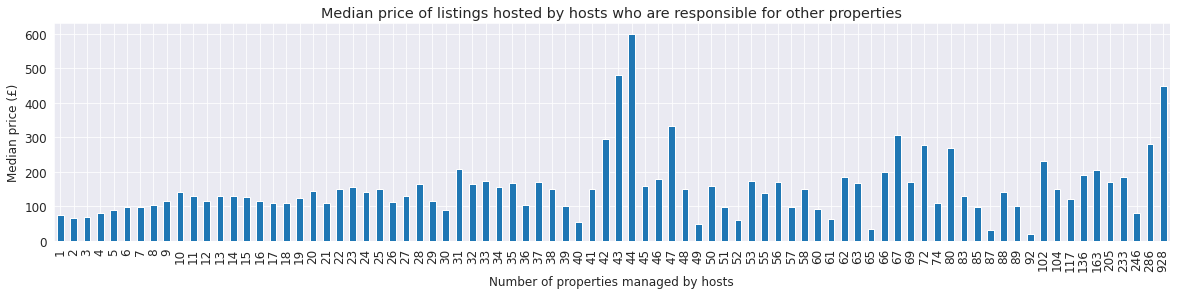

In [243]:
#plotting the median price for different host_listings_count to identify if there is any relation between them
plt.figure()
listings.groupby('calculated_host_listings_count').price.median().plot(figsize=(20,4), kind='bar')
plt.title('Median price of listings hosted by hosts who are responsible for other properties')
plt.xlabel('Number of properties managed by hosts')
plt.xticks(rotation=90)
plt.ylabel('Median price (£)')

###### amenities

Amenities offered is one of the important feature that a guest look for while booking a room. 
Let's check the relation of each amenity and price.

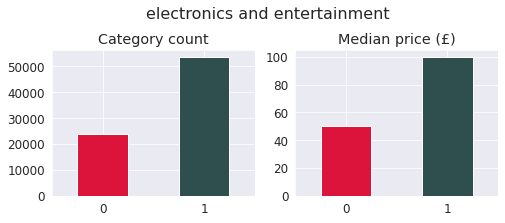

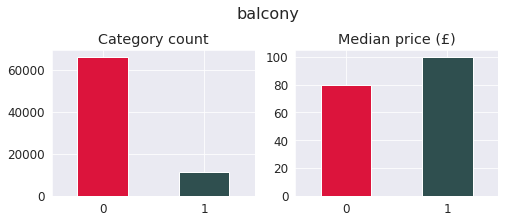

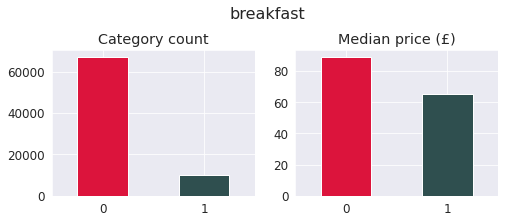

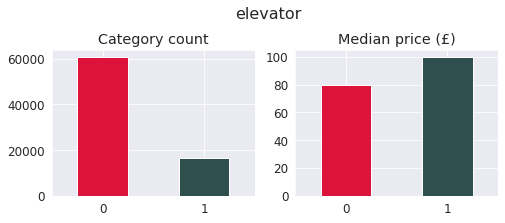

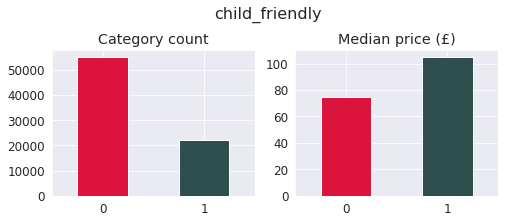

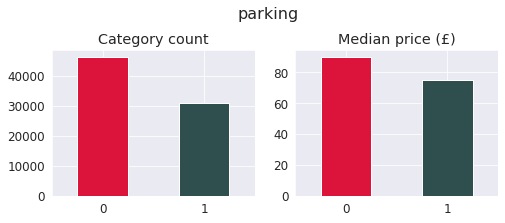

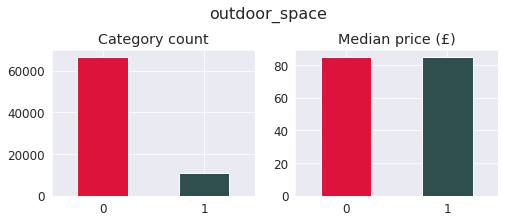

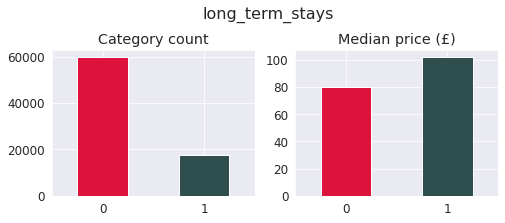

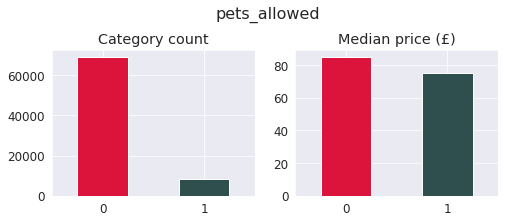

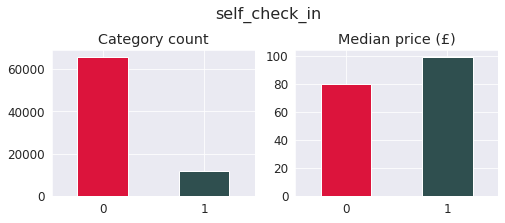

In [244]:
#plotting count and median price plot for all the amenities
for column in listings.iloc[:,20:].columns:
    binary_count_medianprice_plot(column)

All the features look important and proportional to the median except 'outdoor_space' and 'pets_allowed'. Median price is almost same even if this amenity is present or not. 
Drop these 2 columns. 

In [0]:
#dropping columns
columns_to_drop = ['outdoor_space', 'pets_allowed']
listings.drop(columns_to_drop, axis=1, inplace=True)

###### price

Show the distribution of price i.e, the number of listings per night price. 

Price Distribution of Listings

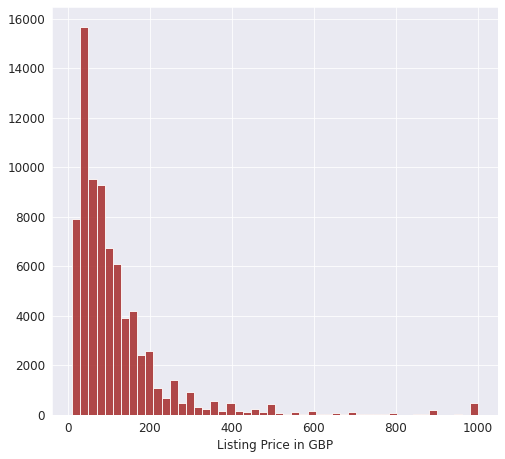

In [246]:
#plotting the distribution of price
fig, ax = plt.subplots(figsize = (8, 7.5))
d, bins, patches = ax.hist(listings['price'], 50, color= "brown", alpha = 0.85)
ax.set_xlabel("Listing Price in GBP")
plt.show()

The distribution is positively skewed. Price mostly range between 10 to 200 pounds. So let's look at the distribution of price ranging from 0 to 200. 

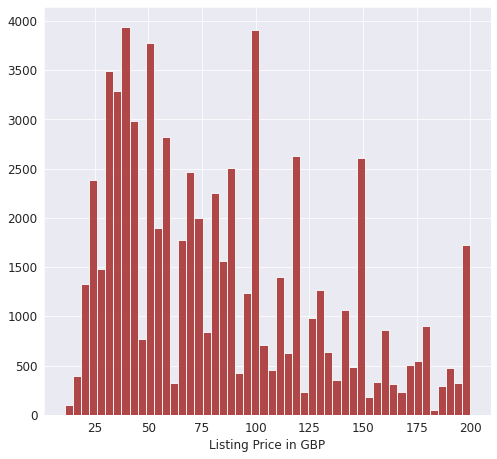

In [247]:
#plotting the distribution of price less than 200
fig, ax = plt.subplots(figsize = (8, 7.5))
d, bins, patches = ax.hist(listings[listings['price']<=200].price, 50, color= "brown", alpha = 0.85)
ax.set_xlabel("Listing Price in GBP")
plt.show()

Most of the listings have price between 25 and 30 and there are many listings with price almost 100. 

Price based on geographical data i.e, latitude and longitude

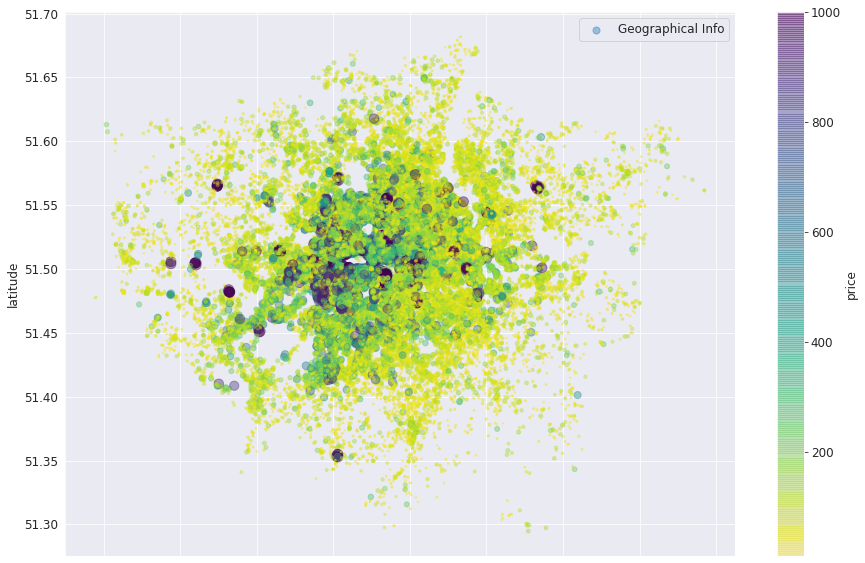

In [248]:
#plot the price against geographical area to identify spread of expensive listings around London
# Price based on geographical data
listings.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4
             ,s=listings['price']/10
             , label = 'Geographical Info'
            , c = 'price', figsize =(15,10)
            , cmap = plt.get_cmap("viridis_r")
            , colorbar=True);
plt.legend()

Distribution of price over London is visualized using Latitude and Longitude. Most of the listings geographically distributed all over London have price less than 200 and few listings have higher price.
Unsurprisingly, as we move away fromCentral London the price of the listings decreases 

Geographical information related columns such as latitude and longitude can be dropped as those are no longer required. 

In [0]:
#dropping columns
columns_to_drop = ['latitude', 'longitude']
listings.drop(columns_to_drop, axis=1, inplace=True)

Let's check the relation between price and other numerical features. 

In [0]:
#creating a list of numerical features
numerical_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
                      'guests_included', 'minimum_nights', 'availability_90', 'number_of_reviews_ltm', 
                      'calculated_host_listings_count', 'price']

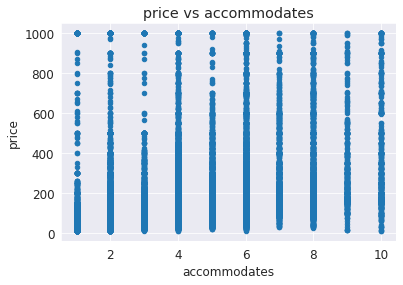

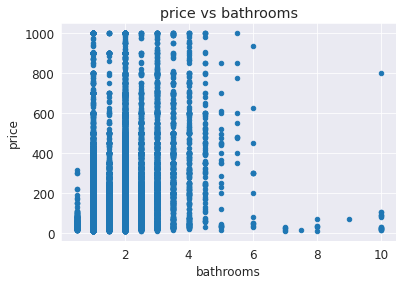

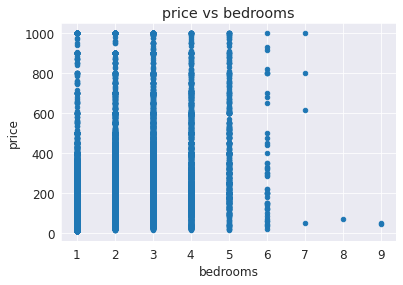

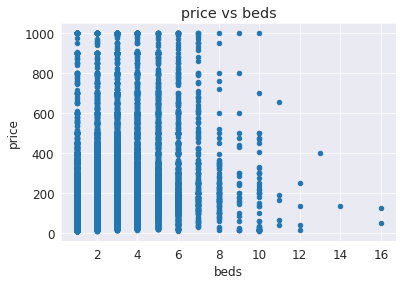

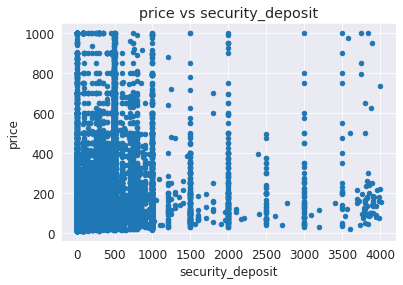

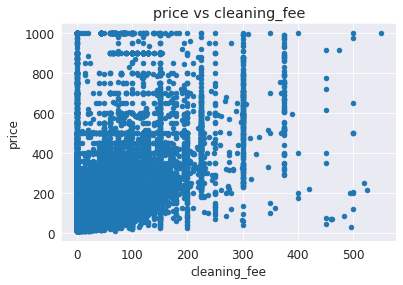

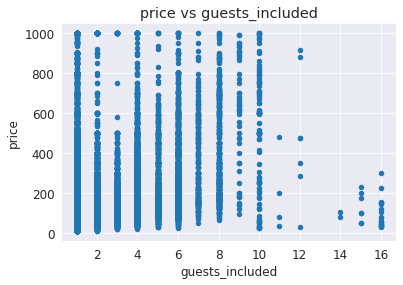

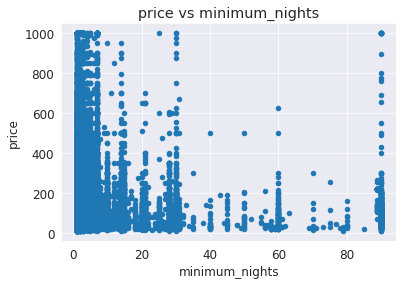

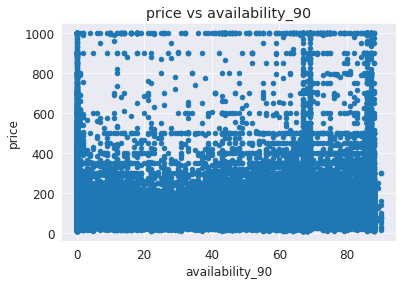

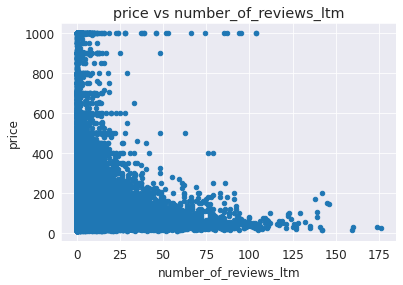

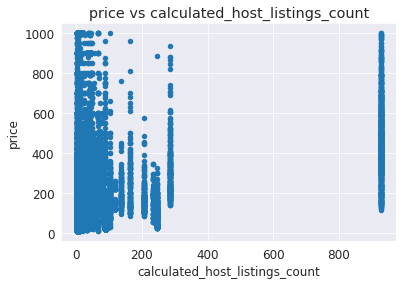

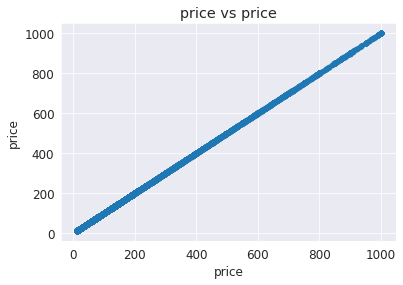

In [251]:
#plotting scatterplot to identify the relation between different price and other numerical features
for column in numerical_features:
    listings.sort_values(by=[column]).plot.scatter(x=column, y='price', title='price vs {}'.format(column))

From the scatter plots generated, it is clear that availability_90 clearly does not depend on price as all availability rates are there for all price ranges. 
So, let's drop this column availabilty_90 to reduce the curse of dimensionality. 

In [0]:
#dropping availability_90
listings.drop('availability_90', axis=1, inplace=True)

Drop it from numerical_features list also. 

In [0]:
#dropping from numerical_features list
numerical_features.remove('availability_90')

Save the dataset for bayesian analysis before modelling it. 

In [0]:
#saving the data as csv for bayesian analysis
listings.to_csv(r'listings_b.csv', index=False, header=True)

#### Feature Selection

Feature selection has been happening since the beginning of the notebook as we have been dropping features based on different criterias. 

Let's do one-hot encoding to convert categorical variables into binary. 

In [0]:
#converting categorical features to one-hot encoded features
listings = pd.get_dummies(listings)

Let's see the columns of the transformed dataframe. 

In [256]:
#printing the columns of the dataset
print(listings.columns.tolist())

['host_is_superhost', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'minimum_nights', 'number_of_reviews_ltm', 'calculated_host_listings_count', 'electronics and entertainment', 'balcony', 'breakfast', 'elevator', 'child_friendly', 'parking', 'long_term_stays', 'self_check_in', 'neighbourhood_Barking and Dagenham', 'neighbourhood_Barnet', 'neighbourhood_Bexley', 'neighbourhood_Brent', 'neighbourhood_Bromley', 'neighbourhood_Camden', 'neighbourhood_City of London', 'neighbourhood_Croydon', 'neighbourhood_Ealing', 'neighbourhood_Enfield', 'neighbourhood_Greenwich', 'neighbourhood_Hackney', 'neighbourhood_Hammersmith and Fulham', 'neighbourhood_Haringey', 'neighbourhood_Harrow', 'neighbourhood_Havering', 'neighbourhood_Hillingdon', 'neighbourhood_Hounslow', 'neighbourhood_Islington', 'neighbourhood_Kensington and Chelsea', 'neighbourhood_Kingston upon Thames', 'neighbourhood_Lambeth', 'neighbourhood_Lewisham', 'neighbourho

As there are so many features, let's check the correlation of all features except the neighbourhood one as there are 33 neighbourhoods and it is difficult to visualize all the features in a heatmap. 

In [0]:
#features to check correlation
num_bin_cat_features = ['host_is_superhost', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 
                       'cleaning_fee', 'guests_included', 'minimum_nights', 'number_of_reviews_ltm', 
                       'calculated_host_listings_count', 'electronics and entertainment', 'balcony', 'breakfast', 'elevator', 
                       'child_friendly', 'parking', 'long_term_stays', 'self_check_in', 'property_type_Apartment', 
                       'property_type_House', 'property_type_Other', 'room_type_Entire home/apt', 'room_type_Hotel room', 
                       'room_type_Private room', 'room_type_Shared room', 'review_scores_rating_0-79/100', 
                       'review_scores_rating_80-94/100', 'review_scores_rating_95-100/100', 'review_scores_rating_no reviews', 
                       'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict']

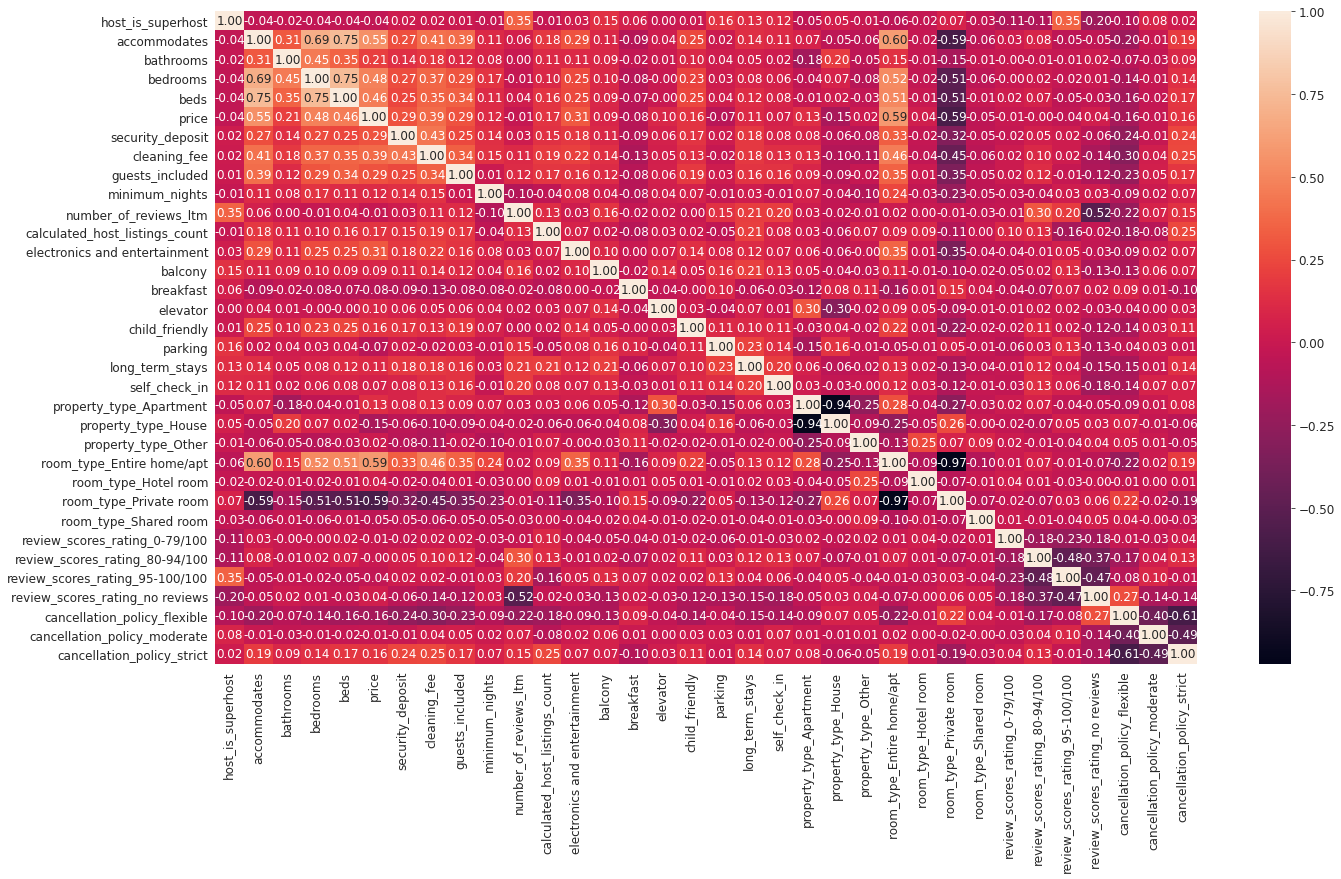

In [258]:
# plotting heatmap
corr = listings[num_bin_cat_features].corr(method='kendall')
plt.figure(figsize=(22,12))
sns.heatmap(corr, annot=True, fmt=".2f")

As expected, columns such as bedrooms, beds, guests_included are highly correlated to the feature accomodates. 
Eventhough  room_type_Entire home/apt has strong correlation with the accommodates, it would not make sense to drop any of it as both are equally important in predicting price. 
number_of_reviews_ltm has strong negative correlation with review_scores_rating_no_review and positive correlation with host_is_superhost. 
room_type_Private room has strong negative correlation with room_type_Entire home/apt. Same happens between property_type_House and property_type_Apartment. Features such as cancellation_policy_moderate and cancellation_policy_flexible have negative correlation with cancellation_policy_strict. 
So features such as bedrooms, beds, guests_included, number_of_reviews_ltm, room_type_Private_room, property_type_House, cancellation_policy_flexible and cancellation_policy_moderate can be dropped before modelling.

In [0]:
#dropping columns
columns_to_drop = ['bedrooms', 'beds', 'guests_included', 'number_of_reviews_ltm', 'room_type_Private room', 
                   'property_type_House' , 'cancellation_policy_flexible', 'cancellation_policy_moderate']
listings.drop(columns_to_drop, axis=1, inplace=True)

Remove the columns bedrooms, beds, guests_included and number_of_reviews_ltm from numerical_features list. 

In [0]:
#removing the dropped columns from the numerical_features list
numerical_features.remove('bedrooms')
numerical_features.remove('beds')
numerical_features.remove('guests_included')
numerical_features.remove('number_of_reviews_ltm')

Let's check data correaltion of different featues with price to get better insights. 

In [261]:
#checking data correaltion of all the features with price
corr = listings.corr()
print(corr['price'].sort_values(ascending=False))

price                                   1.000000
accommodates                            0.486767
cleaning_fee                            0.474074
room_type_Entire home/apt               0.385295
bathrooms                               0.332880
calculated_host_listings_count          0.318186
security_deposit                        0.273342
electronics and entertainment           0.237586
neighbourhood_Westminster               0.203102
neighbourhood_Kensington and Chelsea    0.170660
cancellation_policy_strict              0.145216
property_type_Other                     0.132817
review_scores_rating_no reviews         0.123711
child_friendly                          0.092547
long_term_stays                         0.091969
room_type_Hotel room                    0.079598
balcony                                 0.059344
neighbourhood_Camden                    0.058984
elevator                                0.056762
neighbourhood_Hammersmith and Fulham    0.045992
neighbourhood_City o

Features such as accommodates, cleaning_fee, room_type_Entire home/apt and    bathrooms are highly correlated to price.  

## Data Modelling

Let's prepare the data for modelling. Check the distribution of numerical features. 

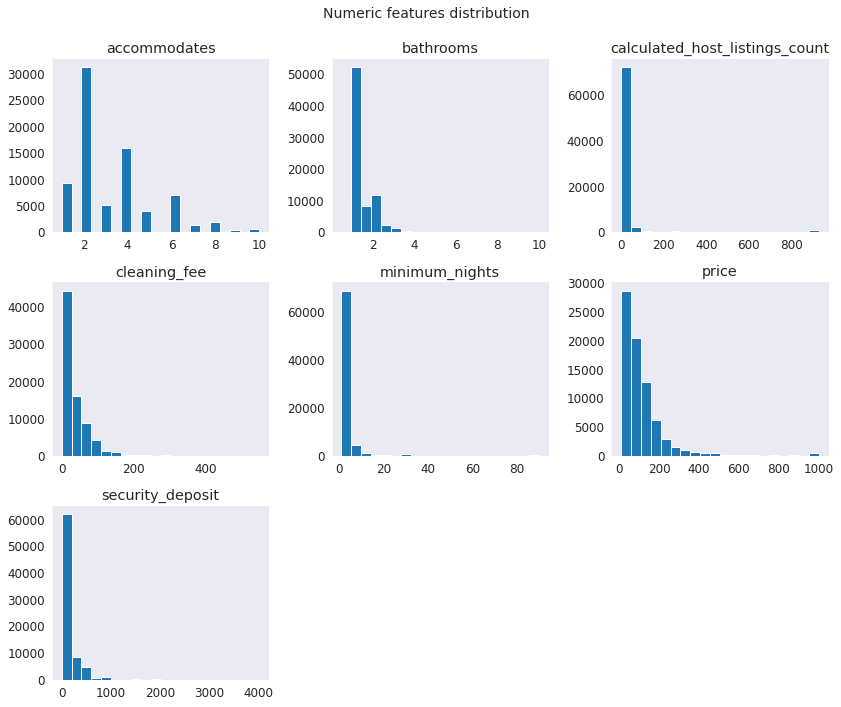

In [262]:
#checking the distribution of all numerical features
listings[numerical_features].hist(figsize=(12, 10), bins=20, grid=False)
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

All the numerical variables are positively skewed. 
Let's try to remove that and bring a normal distribution for all these features. 

In [0]:
# Log-transforming columns 
for column in numerical_features:
    listings[column] = listings[column].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    listings[column] = np.log(listings[column])

Let's check the distribution again now. 

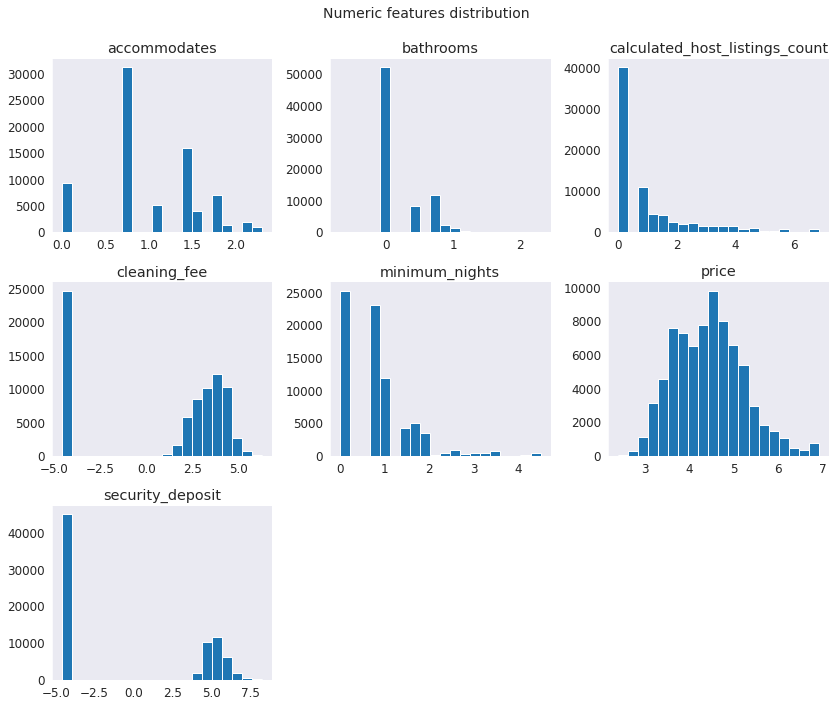

In [264]:
#checking the distribution
listings[numerical_features].hist(figsize=(12, 10), bins=20, grid=False)
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

Target variable price looks much more normally distributed now. 

Now, split the data into train and test set. 

In [0]:
#training features
x = listings.drop('price', axis=1)
#training labels
y = listings.price

Scaling should be done. StandardScaler from sklearn  is used for it. 

In [0]:
# Scaling all the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=list(x.columns))

Split the data into train and test set. The test set has 20% of data. 

In [0]:
#splitting data into train and test set in the ratio 8:2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

Create a function to evaluate the model

In [0]:
#creating a function to evaluate the model, rmse r2 and the time taken
def evaluate_model(time_taken,train_rmse,test_rmse,train_r2,test_r2):
    print(f"Time taken to run:"+str(time_taken)+" minutes")
    print("\nTraining RMSE:", train_rmse)
    print("Validation RMSE:", test_rmse)
    print("\nTraining r2:", train_r2)
    print("Validation r2:", test_r2)

##### Model 1: Linear Regression

Create a linear regression model. 

In [269]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time

train_start_time = time.time()
lr_model=LinearRegression()
#train the model using train set
lr_model.fit(x_train,y_train)
y_train_pred_lr=lr_model.predict(x_train)
#make predictions using the test set
y_test_pred_lr=lr_model.predict(x_test)
train_end_time = time.time()

#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_lr = round((train_end_time - train_start_time)/60,1)
train_rmse_lr = round(np.sqrt(mean_squared_error(y_train, y_train_pred_lr)),4)
test_rmse_lr = round(np.sqrt(mean_squared_error(y_test, y_test_pred_lr)),4)
train_r2_lr = round(r2_score(y_train, y_train_pred_lr),4)
test_r2_lr = round(r2_score(y_test, y_test_pred_lr),4)
#printing the results
evaluate_model(time_taken_lr,train_rmse_lr,test_rmse_lr,train_r2_lr,test_r2_lr)

Time taken to run:0.0 minutes

Training RMSE: 0.4648
Validation RMSE: 0.4609

Training r2: 0.6534
Validation r2: 0.6636


Let's plot the relation between predicted and actual value for this case as it shows the best performance.  

Text(0, 0.5, 'Actual Value')

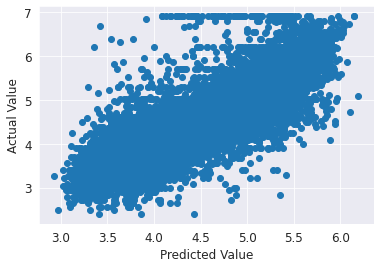

In [270]:
#plotting predicted value against actual value
plt.scatter(y_test_pred_lr, y_test, marker='o')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

##### Model 2: Decision Tree Regressor

Model a decision tree regressor. 

In [271]:
#Prepare a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

train_start_time = time.time()
dt_model=DecisionTreeRegressor()
#train the model using train set
dt_model.fit(x_train,y_train)
y_train_pred_dt=dt_model.predict(x_train)
#make predictions using the test set
y_test_pred_dt=dt_model.predict(x_test)
train_end_time = time.time()
#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_dt = round((train_end_time - train_start_time)/60,1)
train_rmse_dt = round(np.sqrt(mean_squared_error(y_train, y_train_pred_dt)),4)
test_rmse_dt = round(np.sqrt(mean_squared_error(y_test, y_test_pred_dt)),4)
train_r2_dt = round(r2_score(y_train, y_train_pred_dt),4)
test_r2_dt = round(r2_score(y_test, y_test_pred_dt),4)
#printing the results
evaluate_model(time_taken_dt,train_rmse_dt,test_rmse_dt,train_r2_dt,test_r2_dt)

Time taken to run:0.0 minutes

Training RMSE: 0.0848
Validation RMSE: 0.536

Training r2: 0.9885
Validation r2: 0.5449


Let's try tuning the model with hyperparameters of appropriate values to obtain better performance. 

First get the parameters used. 

In [272]:
#parameters used
print(dt_model.get_params())

{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


Grid Search with Cross Validation is used to do cross validation and tuning of hyperparameters. Values given as hyperparameters are few values which we felt would be appropriate for the model.  

In [273]:
#implementing gridsearchcv
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 3, 4, 5, 6], 'min_samples_leaf': [0.01,0.1,1,2]}

# Instantiate the grid search model
grid_search = GridSearchCV(dt_model, param_grid=param_grid, scoring='neg_median_absolute_error', cv=3)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)
#get best parameters
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 2}

Let's try these hyperparameters. 

In [274]:
#tuned decision tree
train_start_time = time.time()
#train the model using train set and hyper parameters
dt_model_t=DecisionTreeRegressor(max_depth=6,min_samples_leaf=2)
dt_model_t.fit(x_train,y_train)
y_train_pred_dt_t=dt_model_t.predict(x_train)
#make predictions using the test set
y_test_pred_dt_t=dt_model_t.predict(x_test)
train_end_time = time.time()
#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_dt_t = round((train_end_time - train_start_time)/60,1)
train_rmse_dt_t = round(np.sqrt(mean_squared_error(y_train, y_train_pred_dt_t)),4)
test_rmse_dt_t = round(np.sqrt(mean_squared_error(y_test, y_test_pred_dt_t)),4)
train_r2_dt_t = round(r2_score(y_train, y_train_pred_dt_t),4)
test_r2_dt_t = round(r2_score(y_test, y_test_pred_dt_t),4)
#printing the results
evaluate_model(time_taken_dt_t,train_rmse_dt_t,test_rmse_dt_t,train_r2_dt_t,test_r2_dt_t)

Time taken to run:0.0 minutes

Training RMSE: 0.4644
Validation RMSE: 0.4727

Training r2: 0.6541
Validation r2: 0.6461


Let's plot the relation between predicted and actual value for this case as it shows the best performance.  

Text(0, 0.5, 'Actual Value')

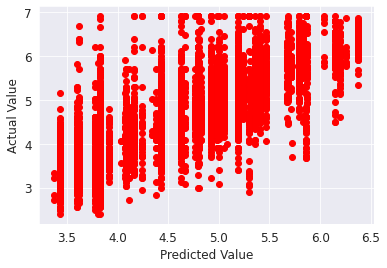

In [275]:
#plotting predicted value against actual value
plt.scatter(y_test_pred_dt_t, y_test, marker='o', color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

##### Model 3: RandomForest Regressor

Model a randomforest regressor. 

In [276]:
#Prepare Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

train_start_time= time.time()
rf_model=RandomForestRegressor()
#train the model using train set
rf_model.fit(x_train,y_train)
y_train_pred_rf=rf_model.predict(x_train)
#make predictions using the test set
y_test_pred_rf=rf_model.predict(x_test)
train_end_time = time.time()
#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_rf = round((train_end_time - train_start_time)/60,1)
train_rmse_rf = round(np.sqrt(mean_squared_error(y_train, y_train_pred_rf)),4)
test_rmse_rf = round(np.sqrt(mean_squared_error(y_test, y_test_pred_rf)),4)#test rmse
train_r2_rf = round(r2_score(y_train, y_train_pred_rf),4)
test_r2_rf = round(r2_score(y_test, y_test_pred_rf),4)#test r2 score
#printing the results
evaluate_model(time_taken_rf,train_rmse_rf,test_rmse_rf,train_r2_rf,test_r2_rf)

Time taken to run:0.8 minutes

Training RMSE: 0.1661
Validation RMSE: 0.3989

Training r2: 0.9558
Validation r2: 0.7479


Let's try tuning the hyperparameters with appropriate values. 

First get the parameters used. 

In [277]:
#parameters used
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Grid Search

In [278]:
#implementing gridsearchcv
param_grid = {'random_state': [21,42],
            'n_estimators': [100,250]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, 
                           scoring = 'neg_median_absolute_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)
#get best parameters
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  8.7min finished


{'n_estimators': 250, 'random_state': 42}

Let's try these hyperparameters. 

In [279]:
#tuned random forest
train_start_time = time.time()
#train the model using train set and hyper parameters 
rf_model_t=RandomForestRegressor(n_estimators = 250, random_state = 42)
rf_model_t.fit(x_train,y_train)
y_train_pred_rf_t=rf_model_t.predict(x_train)
#make predictions using the test set
y_test_pred_rf_t=rf_model_t.predict(x_test)
train_end_time = time.time()
#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_rf_t = round((train_end_time - train_start_time)/60,1)
train_rmse_rf_t = round(np.sqrt(mean_squared_error(y_train, y_train_pred_rf_t)),4)
test_rmse_rf_t = round(np.sqrt(mean_squared_error(y_test, y_test_pred_rf_t)),4)#test rmse
train_r2_rf_t = round(r2_score(y_train, y_train_pred_rf_t),4)
test_r2_rf_t = round(r2_score(y_test, y_test_pred_rf_t),4)#test r2 score
#printing the results
evaluate_model(time_taken_rf_t,train_rmse_rf_t,test_rmse_rf_t,train_r2_rf_t,test_r2_rf_t)

Time taken to run:2.0 minutes

Training RMSE: 0.1641
Validation RMSE: 0.3977

Training r2: 0.9568
Validation r2: 0.7494


Let's plot the relation between predicted and actual value for this case as it shows the best performance.  

Text(0, 0.5, 'Actual Value')

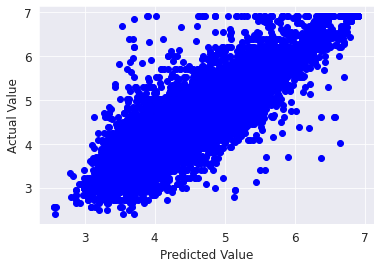

In [280]:
#plotting predicted value against actual value
plt.scatter(y_test_pred_rf_t, y_test, marker='o', color='b')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

Top 10 features

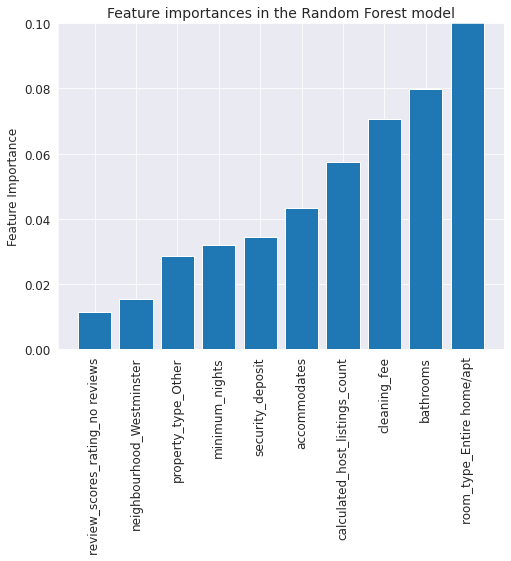

In [281]:
#calculating important features of the model
model_weights = pd.DataFrame(rf_model_t.feature_importances_, columns=['weight'], index=x_train.columns)
model_weights.sort_values('weight', inplace=True)
#plotting top 10 features
plt.figure(figsize=(8,6))
plt.bar(model_weights.index[-10:], model_weights.weight[-10:], align='center') 
plt.title("Feature importances in the Random Forest model", fontsize=14)
plt.ylabel("Feature Importance")
plt.ylim(0,0.1)
plt.xticks(range(10),rotation=90)
plt.margins(y=0.01)
plt.show()

##### Model 4: XGBoost


In [282]:
#xgb regressor
import xgboost as xgb

train_start_time = time.time()
#train the model using train set
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)
y_train_pred_xgb = xgb_model.predict(x_train)
#make predictions using the test set
y_test_pred_xgb = xgb_model.predict(x_test)
train_end_time = time.time()
#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_xgb = round((train_end_time - train_start_time)/60,1)
train_rmse_xgb = round(np.sqrt(mean_squared_error(y_train, y_train_pred_xgb)),4)
test_rmse_xgb = round(np.sqrt(mean_squared_error(y_test, y_test_pred_xgb)),4)
train_r2_xgb = round(r2_score(y_train, y_train_pred_xgb),4)
test_r2_xgb = round(r2_score(y_test, y_test_pred_xgb),4)
#printing the results
evaluate_model(time_taken_xgb,train_rmse_xgb,test_rmse_xgb,train_r2_xgb,test_r2_xgb)

[11:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run:0.1 minutes

Training RMSE: 0.43
Validation RMSE: 0.4332

Training r2: 0.7034
Validation r2: 0.7027


Let's try tuning the model

First get the parameters used. We will tune only very important parameters with appropriate values. 

In [283]:
#parameters used
print(xgb_model.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


Grid Search with Cross Validation

In [284]:
#implementing gridsearchcv
param_grid = {'xgbregressor__learning_rate': [0.1,0.01], 
              'xgbregressor__max_depth': [5,7,9],
              'xgbregressor__n_estimators': [500,900]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb_model,
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, 
                           scoring = 'neg_median_absolute_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)
#get best parameters
grid_search.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.8min finished


[11:27:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'xgbregressor__learning_rate': 0.1,
 'xgbregressor__max_depth': 5,
 'xgbregressor__n_estimators': 500}

Now try running the model with tuned hyperparameters. 

In [285]:
#tuned xgb model
train_start_time = time.time()
xgb_model_t = xgb.XGBRegressor(max_depth=5,n_estimators=500,learning_rate=0.1)
#train the model using train set
xgb_model_t.fit(x_train, y_train)
y_train_pred_xgb_t = xgb_model_t.predict(x_train)
#make predictions using the test set
y_test_pred_xgb_t = xgb_model_t.predict(x_test)
train_end_time = time.time()
#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_xgb_t = round((train_end_time - train_start_time)/60,1)
train_rmse_xgb_t = round(np.sqrt(mean_squared_error(y_train, y_train_pred_xgb_t)),4)
test_rmse_xgb_t = round(np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_t)),4)
train_r2_xgb_t = round(r2_score(y_train, y_train_pred_xgb_t),4)
test_r2_xgb_t = round(r2_score(y_test, y_test_pred_xgb_t),4)
#printing the results
evaluate_model(time_taken_xgb_t,train_rmse_xgb_t,test_rmse_xgb_t,train_r2_xgb_t,test_r2_xgb_t)

[11:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run:1.1 minutes

Training RMSE: 0.365
Validation RMSE: 0.3898

Training r2: 0.7863
Validation r2: 0.7593


Let's plot the relation between predicted and actual value for this case as it shows the best performance.  

Text(0, 0.5, 'Actual Value')

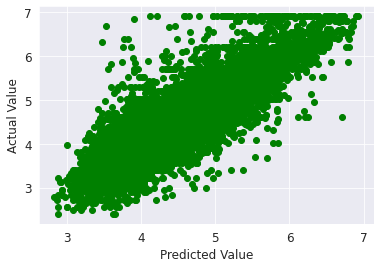

In [286]:
plt.scatter(y_test_pred_xgb_t, y_test, marker='o', color='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

Let's see the importance of each features and plot it. 

In [287]:
#checking the importance of different features of the model
model_weights = pd.DataFrame(xgb_model_t.feature_importances_, columns=['weight'], index=x_train.columns)
model_weights.sort_values('weight', inplace=True)
model_weights

weight
neighbourhood_Merton                  0.001119
balcony                               0.001256
neighbourhood_Brent                   0.001511
neighbourhood_Hounslow                0.001567
host_is_superhost                     0.001610
neighbourhood_Hackney                 0.001843
review_scores_rating_0-79/100         0.001895
self_check_in                         0.001914
neighbourhood_Lambeth                 0.001964
breakfast                             0.001990
neighbourhood_Kingston upon Thames    0.002031
neighbourhood_Tower Hamlets           0.002117
review_scores_rating_95-100/100       0.002268
neighbourhood_Ealing                  0.002517
long_term_stays                       0.002738
property_type_Apartment               0.002876
neighbourhood_Wandsworth              0.002923
neighbourhood_Hillingdon              0.002954
neighbourhood_Sutton                  0.003105
neighbourhood_Enfield                 0.003119
neighbourhood_Bexley                  0.003176
neighbourhood_Harrow                  0.003183
minimum_nights                        0.003324
child_friendly                        0.003336
neighbourhood_Greenwich               0.003480
neighbourhood_Newham                  0.003555
neighbourhood_Richmond upon Thames    0.003572
cancellation_policy_strict            0.003704
neighbourhood_Barking and Dagenham    0.003751
neighbourhood_Barnet                  0.003950
parking                               0.004083
room_type_Shared room                 0.004366
neighbourhood_Hammersmith and Fulham  0.004417
neighbourhood_Southwark               0.004468
neighbourhood_Havering                0.004554
neighbourhood_Redbridge               0.005320
elevator                              0.005593
neighbourhood_Bromley                 0.005698
review_scores_rating_80-94/100        0.006126
neighbourhood_Haringey                0.006569
neighbourhood_City of London          0.006651
security_deposit                      0.006826
calculated_host_listings_count        0.007847
neighbourhood_Islington               0.008330
neighbourhood_Croydon                 0.010714
electronics and entertainment         0.010759
neighbourhood_Waltham Forest          0.010800
cleaning_fee                          0.011009
review_scores_rating_no reviews       0.011148
neighbourhood_Lewisham                0.011898
room_type_Hotel room                  0.013736
neighbourhood_Camden                  0.018945
accommodates                          0.021452
bathrooms                             0.026033
neighbourhood_Kensington and Chelsea  0.031191
property_type_Other                   0.032630
neighbourhood_Westminster             0.034723
room_type_Entire home/apt             0.595768

Top 10 important features

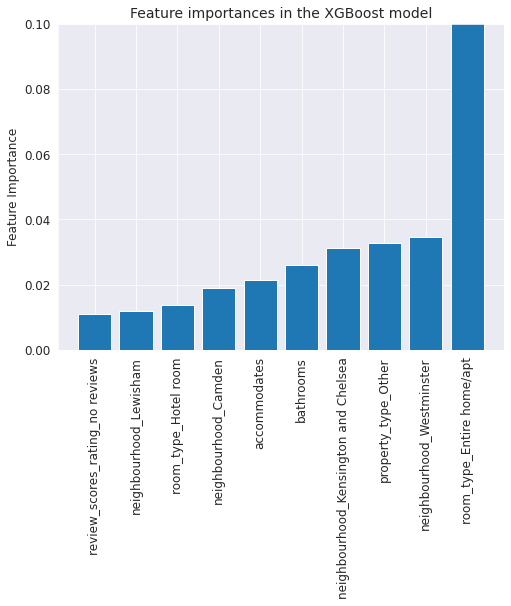

In [288]:
#plotting top 10 features of xgb model
plt.figure(figsize=(8,6))
plt.bar(model_weights.index[-10:], model_weights.weight[-10:], align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.ylabel("Feature Importance")
plt.ylim(0,0.1)
plt.xticks(range(10),rotation=90)
plt.margins(y=0.01)
plt.show()

The feature room_type_Entire_home/apt has greater importance compared to other top 10 features. 

### Model Comparison

Let's plot the accuracy and RMSE of all the models. 

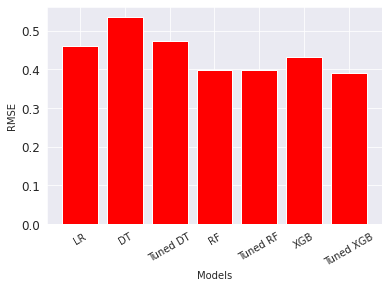

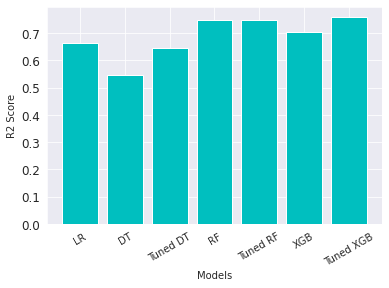

In [289]:
#plotting rmse of all models
label = ['LR', 'DT', 'Tuned DT', 'RF', 'Tuned RF', 'XGB', 'Tuned XGB']#labels
rmse = [test_rmse_lr, test_rmse_dt, test_rmse_dt_t, test_rmse_rf, test_rmse_rf_t, test_rmse_xgb, test_rmse_xgb_t]#values
r2_score = [test_r2_lr, test_r2_dt, test_r2_dt_t, test_r2_rf, test_r2_rf_t, test_r2_xgb, test_r2_xgb_t]
index = np.arange(len(label))
plt.bar(index, rmse, color="r")
plt.xlabel('Models', fontsize=10)
plt.ylabel('RMSE', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.show()
#plotting r2 score of all models
label = ['LR', 'DT', 'Tuned DT', 'RF', 'Tuned RF', 'XGB', 'Tuned XGB']#labels
rmse = [test_rmse_lr, test_rmse_dt, test_rmse_dt_t, test_rmse_rf, test_rmse_rf_t, test_rmse_xgb, test_rmse_xgb_t]#values
r2_score = [test_r2_lr, test_r2_dt, test_r2_dt_t, test_r2_rf, test_r2_rf_t, test_r2_xgb, test_r2_xgb_t]
index = np.arange(len(label))
plt.bar(index, r2_score, color="c")
plt.xlabel('Models', fontsize=10)
plt.ylabel('R2 Score', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.show()

Tuned XGB Model performs the best. It has highest r2_score value and least root mean square error. Tuned RandomForest Model shows 2nd best performance whereas untuned DecisionTreeRegressor shows worst performance. Random Forest models shows considerably good performance even without tuning. 